<a href="https://colab.research.google.com/github/diogoruivo47/Data-Mining/blob/main/draft_3_full_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, r2_score
from sklearn.model_selection import ParameterSampler
from scipy.spatial.distance import cdist

warnings.filterwarnings('ignore')

Optuna was installed for grid search via bayesian probability

In [2]:
# !pip install optuna

# current plan to merge the data

each DF should include cluster labels (C1 + C2.... etc)
a unique Identifier

Centroids of cluster

formate data for aligbments mean or median of clusters and variability/STDV

compare pairwise similary,
  check numerical w euclidian cosine similary to see represent directionality
    present in a distance matrix with each row and column corresponding to clusters

after score silhouette etc and R2 for totaldataset
use T-sne

start grunt work for report, use labs if needed
--------------------------------------------------

mathematically speaking the merge via hierarchical works via the profile describing a cluster, meaning, the centroids, the distribution of statistics and cluster proportions.

combining these will create your final DF merged non refull clustered blablablabla, so follow steps above.


------------------------------------------------------------------------------
plan when improving data for clustering in NOV:

split numericals from categoricals,

reduce feature amounts in preferences and shopping,

improve silhouette overall and find ideal model

In [3]:
df = pd.read_csv('data_clean.csv')

In [4]:
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,RFM_Score,customer_region_0,customer_region_1,customer_region_2,customer_region_3
0,0,2.0,5.0,1.0,1,2,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,28.88,14.440,2.25,1.000000,90.0,2.0,0.0,1,0.092846,0,0,0,0,2,0,2.65,0.0,1.0,0.0,0.0
1,1,2.0,2.0,2.0,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,19.21,9.600,1.00,1.000000,90.0,2.0,0.0,0,0.090596,0,0,2,0,0,0,2.35,0.0,0.0,0.0,1.0
2,2,1.0,2.0,2.0,2,0,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.0,9.20,4.600,1.00,1.000000,90.0,2.0,0.5,3,0.088267,0,0,2,0,0,0,2.05,0.0,0.0,1.0,0.0
3,3,2.0,3.0,1.0,1,2,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,31.56,15.780,1.50,0.666667,89.0,3.0,0.0,2,0.066010,0,0,1,1,0,0,2.65,0.0,0.0,1.0,0.0
4,4,2.0,5.0,0.0,0,2,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.0,55.44,24.695,2.25,0.666667,89.0,3.0,0.0,1,0.071566,0,0,2,0,0,0,2.95,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,31883,1.0,1.0,1.0,3,2,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,18.04,18.040,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,0,1,0,0,3.40,0.0,0.0,0.0,1.0
31733,31884,1.0,1.0,0.0,1,2,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,18.04,18.040,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,0,0,1,0,3.40,0.0,0.0,0.0,1.0
31734,31885,1.0,1.0,1.0,0,2,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,17.79,17.790,1.00,1.000000,0.0,1.0,0.0,1,0.186393,0,1,0,0,0,0,3.40,0.0,0.0,0.0,1.0
31735,31886,1.0,1.0,0.0,2,2,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.0,12.03,12.030,1.00,1.000000,0.0,1.0,0.0,2,0.186393,0,0,1,0,0,0,3.10,0.0,0.0,0.0,1.0


In [5]:
df_copy = df.copy()
df_copy = df_copy.drop(columns=['Unnamed: 0'])
categorical_cols = ['last_promo', 'payment_method', 'customer_region_0', 'customer_region_1', 'customer_region_2', 'customer_region_3']
cat_df = df_copy[categorical_cols].copy()
numerical_cols = df_copy.columns.difference(categorical_cols)
num_df = df_copy[numerical_cols].copy()

In [6]:
num_df

,Age_Group,CLV_Score,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Items_Per_Order,Loyalty,Orders_Afternoon,Orders_Dawn,Orders_Dusk,Orders_Evening,Orders_Morning,Orders_Night,RFM_Score,Total_Orders_Per_Client,activity,frq,is_chain,mnt,mnt_Per_Order,product_count,rcn,vendor_count
0,1,0.092846,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2.25,0.0,0,0,0,2,0,0,2.65,2.0,2.0,1.000000,1.0,28.88,14.440,5.0,90.0,2.0
1,0,0.090596,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,1.00,0.0,0,0,0,0,2,0,2.35,2.0,2.0,1.000000,2.0,19.21,9.600,2.0,90.0,2.0
2,3,0.088267,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,1.00,0.5,0,0,0,0,2,0,2.05,2.0,2.0,1.000000,2.0,9.20,4.600,2.0,90.0,1.0
3,2,0.066010,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,1.50,0.0,1,0,0,0,1,0,2.65,2.0,3.0,0.666667,1.0,31.56,15.780,3.0,89.0,2.0
4,1,0.071566,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2.25,0.0,0,0,0,0,2,0,2.95,2.0,3.0,0.666667,0.0,55.44,24.695,5.0,89.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,2,0.186393,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,1,0,0,0,0,0,3.40,1.0,1.0,1.000000,1.0,18.04,18.040,1.0,0.0,1.0
31733,2,0.186393,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,0,0,1,0,0,3.40,1.0,1.0,1.000000,0.0,18.04,18.040,1.0,0.0,1.0
31734,1,0.186393,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,1,0,0,0,0,3.40,1.0,1.0,1.000000,1.0,17.79,17.790,1.0,0.0,1.0
31735,2,0.186393,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1.00,0.0,0,0,0,0,1,0,3.10,1.0,1.0,1.000000,0.0,12.03,12.030,1.0,0.0,1.0


In [7]:
# Calculate the Spearman correlation matrix
spearman_corr = num_df.corr(method='spearman')

# Display the correlation matrix
spearman_corr



,Age_Group,CLV_Score,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Items_Per_Order,Loyalty,Orders_Afternoon,Orders_Dawn,Orders_Dusk,Orders_Evening,Orders_Morning,Orders_Night,RFM_Score,Total_Orders_Per_Client,activity,frq,is_chain,mnt,mnt_Per_Order,product_count,rcn,vendor_count
Age_Group,1.000000,0.008029,0.005723,0.003923,-0.005109,0.005333,-0.002110,0.002340,-0.005886,0.008266,-0.002564,0.003228,-0.006198,0.002167,0.001896,-0.000755,-0.000782,0.014155,0.002188,0.002543,0.008337,-0.002040,-0.002210,0.003904,0.003364,0.009922,0.006926,-0.002274,0.001361,0.001311,-0.001494,0.000482,0.012170,0.008039,0.006400,-0.003050,0.004309,0.007902,0.002042,0.008210,-0.012532,0.003960
CLV_Score,0.008029,1.000000,0.009025,0.074601,-0.011513,0.059109,-0.044897,0.007215,0.028317,0.028893,0.017270,0.003967,0.042438,-0.021215,0.015072,0.068899,0.017729,0.041674,0.052926,0.063361,0.094587,0.100607,0.016857,-0.004533,0.125428,-0.019965,0.008237,0.043632,-0.022636,-0.041549,0.050462,0.036009,0.713387,-0.106557,-0.183989,0.574515,-0.086399,0.119323,0.223013,-0.043445,-0.406842,-0.107176
CUI_American,0.005723,0.009025,1.000000,0.007332,-0.015387,0.065179,-0.000643,-0.010538,0.010316,0.003491,0.003923,0.057667,0.043318,-0.029172,0.026228,0.012435,0.029675,0.174074,0.175870,0.178959,0.189133,0.197675,0.187075,0.184536,0.031683,0.151400,0.169882,0.084221,0.086375,0.151380,0.187600,0.118107,0.162228,0.338085,0.296255,-0.105781,0.330598,0.280952,-0.013398,0.309508,-0.171845,0.351875
CUI_Asian,0.003923,0.074601,0.007332,1.000000,0.034078,-0.012756,-0.103489,-0.015550,0.075037,0.010005,-0.096040,-0.167585,0.040372,-0.082444,-0.131623,0.130413,-0.060153,0.162734,0.157037,0.156814,0.138672,0.104094,0.112397,0.118334,0.182380,0.045344,0.014751,0.344037,-0.053403,-0.149691,0.244490,0.328527,0.261421,0.252635,0.213526,-0.084808,0.094222,0.454214,0.339130,0.279956,-0.157729,0.297233
CUI_Beverages,-0.005109,-0.011513,-0.015387,0.034078,1.000000,-0.042555,0.094204,0.081135,0.098443,-0.008512,-0.034951,-0.143470,-0.000907,0.094591,0.009404,0.050634,-0.030654,0.127943,0.124477,0.115184,0.113511,0.099975,0.102991,0.093854,0.059450,0.000509,0.109414,0.208893,0.114618,-0.043844,0.145186,0.128476,0.074481,0.198629,0.171857,-0.058217,0.265690,0.135800,-0.060123,0.193098,-0.085882,0.250485
CUI_Cafe,0.005333,0.059109,0.065179,-0.012756,-0.042555,1.000000,-0.009093,-0.000914,-0.016337,0.105053,0.062099,0.121947,0.062444,-0.008576,0.131633,-0.049492,0.083459,0.114885,0.114361,0.116879,0.125629,0.117237,0.103285,0.118858,0.040379,0.111052,0.123698,0.030773,0.023953,0.144162,0.179790,-0.063906,0.125083,0.171584,0.135666,0.006320,0.165666,0.141881,-0.030471,0.167178,-0.103567,0.173375
CUI_Chicken_Dishes,-0.002110,-0.044897,-0.000643,-0.103489,0.094204,-0.009093,1.000000,0.157234,0.025076,-0.012814,0.081248,-0.035988,0.008776,0.210156,0.177586,-0.063354,0.046587,0.137344,0.133062,0.134775,0.132748,0.127351,0.125016,0.132129,0.012387,0.068544,0.179475,-0.107102,0.249155,0.233228,0.075279,-0.062044,0.009108,0.219054,0.183155,-0.036839,0.297081,-0.027078,-0.334315,0.200558,-0.091091,0.247379
CUI_Chinese,0.002340,0.007215,-0.010538,-0.015550,0.081135,-0.000914,0.157234,1.000000,0.026401,0.011930,-0.000944,-0.054318,0.050209,0.215469,0.126193,-0.021589,0.026105,0.137257,0.145548,0.141348,0.140331,0.126429,0.132369,0.148394,0.077362,0.079259,0.146449,-0.000133,0.168401,0.156189,0.115020,0.023641,0.089876,0.229416,0.185766,-0.024667,0.232578,0.095172,-0.167759,0.228505,-0.109997,0.251667
CUI_Desserts,-0.005886,0.028317,0.010316,0.075037,0.098443,-0.016337,0.025076,0.026401,1.000000,0.009390,-0.023756,-0.090356,0.012118,0.007400,-0.023845,0.085192,-0.029708,0.079590,0.077414,0.083423,0.075318,0.058157,0.069065,0.076604,0.045257,-0.010637,0.081983,0.170041,0.031799,-0.053549,0.109716,0.100097,0.08

In [8]:
# Calculate correlation matrix
corr_matrix = num_df.corr(method='spearman')

# Get correlations above 0.5 (excluding self-correlations)
strong_corrs = [(i, j, corr_matrix.loc[i, j])
                for i in corr_matrix.index
                for j in corr_matrix.columns
                if abs(corr_matrix.loc[i, j]) > 0.7 and i < j]

# Print sorted results
print("Correlations above 0.5:")
for var1, var2, corr in sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} - {var2}: {corr:.3f}")

Correlations above 0.5:
Total_Orders_Per_Client - product_count: 0.947
Total_Orders_Per_Client - vendor_count: 0.886
product_count - vendor_count: 0.842
Total_Orders_Per_Client - activity: 0.832
mnt - product_count: 0.795
activity - product_count: 0.784
activity - vendor_count: 0.756
Total_Orders_Per_Client - is_chain: 0.727
activity - frq: -0.718
CLV_Score - RFM_Score: 0.713
is_chain - vendor_count: 0.705


In [9]:
num_df.columns

Index(['Age_Group', 'CLV_Score', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai',
       'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
       'Items_Per_Order', 'Loyalty', 'Orders_Afternoon', 'Orders_Dawn',
       'Orders_Dusk', 'Orders_Evening', 'Orders_Morning', 'Orders_Night',
       'RFM_Score', 'Total_Orders_Per_Client', 'activity', 'frq', 'is_chain',
       'mnt', 'mnt_Per_Order', 'product_count', 'rcn', 'vendor_count'],
      dtype='object')

In [10]:
value_engagement_metrics = [
    # Value
    'mnt', 'mnt_Per_Order', 'CLV_Score', 'RFM_Score',
    # Engagement
    'activity', 'Loyalty', 'frq', 'rcn' , 'Age_Group']

preference_metrics = [
    # Cuisine preferences
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
    'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai'
]

shopping_behavior_metrics = [
    # Shopping patterns
    'vendor_count', 'product_count', 'is_chain', 'Items_Per_Order',
    # Timing preferences
    'Orders_Night', 'Orders_Dawn', 'Orders_Morning', 'Orders_Afternoon',
    'Orders_Evening', 'Orders_Dusk',
    'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'
]

demographic_metrics = [
    'customer_region_0', 'customer_region_1', 'customer_region_2',
    'customer_region_3'
]



In [11]:
df_val = num_df[value_engagement_metrics].copy()
df_pref = num_df[preference_metrics].copy()
df_shop = num_df[shopping_behavior_metrics].copy()


time to reduce feature amount to label data better

In [12]:
print(f"Number of columns in df_pref: {df_pref.shape[1]}")
print(f"Number of columns in df_shop: {df_shop.shape[1]}")
print(f"Number of columns in df_val: {df_val.shape[1]}")

Number of columns in df_pref: 15
Number of columns in df_shop: 17
Number of columns in df_val: 9


Balancing the Cuisine groupings to not have a majority customer group dominate the cluster

In [13]:
cuisine_groups = {
    'Other_Asian': ['CUI_Chinese', 'CUI_Japanese', 'CUI_Noodle_Dishes','CUI_Thai', 'CUI_Indian'],
    'General_Asian' : ['CUI_Asian'],
    'Western': ['CUI_American', 'CUI_Italian'],
    'Beverages_Cafe': ['CUI_Beverages', 'CUI_Cafe'],
    'Desserts_Snacks': ['CUI_Desserts', 'CUI_Street_Food/Snacks'],
    'Main_Dishes': ['CUI_Chicken_Dishes', 'CUI_Healthy', 'CUI_OTHER']
}

# Calculate group totals and percentages
group_totals = {}
total_sum = 0

for group, cuisines in cuisine_groups.items():
    group_sum = num_df[cuisines].sum().sum()
    group_totals[group] = group_sum
    total_sum += group_sum

# Print results
print("Group Totals and Percentages:")
for group, total in group_totals.items():
    percentage = (total / total_sum) * 100
    print(f"{group:15s}: {total:8.0f} ({percentage:5.1f}%)")

print(f"\nTotal Sum:      {total_sum:8.0f}")

Group Totals and Percentages:
Other_Asian    :   242685 ( 19.9%)
General_Asian  :   317325 ( 26.0%)
Western        :   258568 ( 21.2%)
Beverages_Cafe :    98803 (  8.1%)
Desserts_Snacks:   152844 ( 12.5%)
Main_Dishes    :   150454 ( 12.3%)

Total Sum:       1220680


In [14]:
# Create copy
pref_clean = df_pref.copy()

# Initialize new columns for each group
group_columns = {
    'Other_Asian': ['CUI_Chinese', 'CUI_Japanese', 'CUI_Noodle_Dishes', 'CUI_Thai', 'CUI_Indian'],
    'General_Asian': ['CUI_Asian'],
    'Western': ['CUI_American', 'CUI_Italian'],
    'Beverages_Cafe': ['CUI_Beverages', 'CUI_Cafe'],
    'Desserts_Snacks': ['CUI_Desserts', 'CUI_Street_Food/Snacks'],
    'Main_Dishes': ['CUI_Chicken_Dishes', 'CUI_Healthy', 'CUI_OTHER']
}

# Create grouped columns
for group, cuisines in group_columns.items():
    pref_clean[group] = df_pref[cuisines].sum(axis=1)

# Keep only the new grouped columns
pref_clean = pref_clean[list(group_columns.keys())]

In [15]:
pref_clean

,Other_Asian,General_Asian,Western,Beverages_Cafe,Desserts_Snacks,Main_Dishes
0,28.88,0.00,0.00,0.00,0.00,0.0
1,0.00,6.39,12.82,0.00,0.00,0.0
2,0.00,0.00,9.20,0.00,0.00,0.0
3,17.86,13.70,0.00,0.00,0.00,0.0
4,0.00,40.87,14.57,0.00,0.00,0.0
...,...,...,...,...,...,...
31732,0.00,0.00,0.00,18.04,0.00,0.0
31733,0.00,0.00,18.04,0.00,0.00,0.0
31734,0.00,0.00,0.00,0.00,17.79,0.0
31735,0.00,12.03,0.00,0.00,0.00,0.0


loop to decide the ideal elbow point for this segment


k=3:
Silhouette: 0.549
Calinski-Harabasz: 6613.63
Davies-Bouldin: 1.46
SSE: 38342001.56
R2: 0.211
Inertia: 38342001.56

k=4:
Silhouette: 0.479
Calinski-Harabasz: 6080.62
Davies-Bouldin: 1.13
SSE: 34494327.51
R2: 0.277
Inertia: 34494327.51

k=5:
Silhouette: 0.426
Calinski-Harabasz: 4925.90
Davies-Bouldin: 1.34
SSE: 33513651.94
R2: 0.325
Inertia: 33513651.94

k=6:
Silhouette: 0.467
Calinski-Harabasz: 5408.34
Davies-Bouldin: 1.20
SSE: 29328950.39
R2: 0.396
Inertia: 29328950.39

k=7:
Silhouette: 0.472
Calinski-Harabasz: 5924.59
Davies-Bouldin: 0.98
SSE: 25620543.17
R2: 0.460
Inertia: 25620543.17

k=8:
Silhouette: 0.336
Calinski-Harabasz: 5828.44
Davies-Bouldin: 0.99
SSE: 23765066.12
R2: 0.448
Inertia: 23765066.12

k=9:
Silhouette: 0.357
Calinski-Harabasz: 5593.99
Davies-Bouldin: 0.97
SSE: 22536366.22
R2: 0.503
Inertia: 22536366.22

k=10:
Silhouette: 0.345
Calinski-Harabasz: 5634.78
Davies-Bouldin: 0.97
SSE: 20906440.12
R2: 0.534
Inertia: 20906440.12


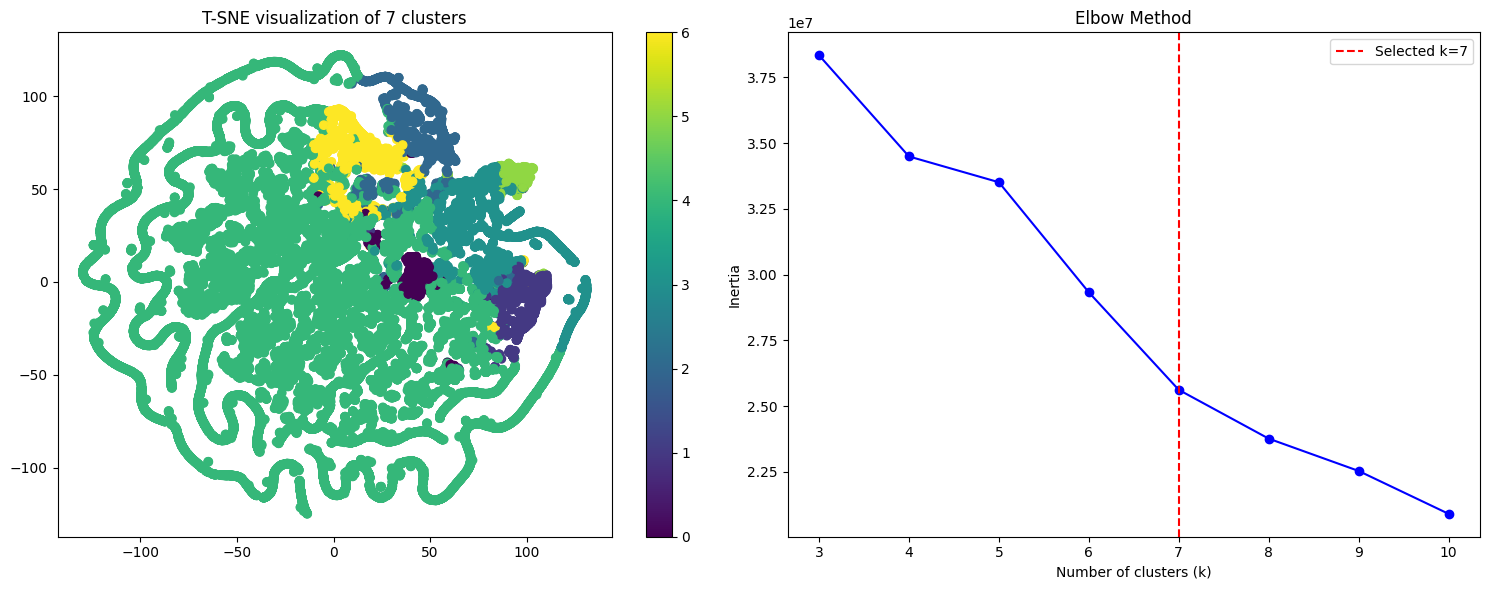

   Other_Asian  General_Asian  Western  Beverages_Cafe  Desserts_Snacks  \
0        28.88           0.00     0.00             0.0              0.0   
1         0.00           6.39    12.82             0.0              0.0   
2         0.00           0.00     9.20             0.0              0.0   
3        17.86          13.70     0.00             0.0              0.0   
4         0.00          40.87    14.57             0.0              0.0   

   Main_Dishes  cluster  
0          0.0        4  
1          0.0        4  
2          0.0        4  
3          0.0        4  
4          0.0        3  


In [16]:
# Ensure pref_clean is a NumPy array
pref_clean_array = pref_clean.values if isinstance(pref_clean, pd.DataFrame) else pref_clean

# Clustering metrics (maintaining for scientific completeness and comparison)
metrics = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(pref_clean_array)

    # Calculate SSE
    sse = np.sum((pref_clean_array - kmeans.cluster_centers_[labels]) ** 2)

    # Calculate R2
    r2 = r2_score(pref_clean_array, kmeans.cluster_centers_[labels])

    metrics.append({
        'k': k,
        'silhouette': silhouette_score(pref_clean_array, labels),
        'calinski': calinski_harabasz_score(pref_clean_array, labels),
        'davies': davies_bouldin_score(pref_clean_array, labels),
        'inertia': kmeans.inertia_,
        'sse': sse,
        'r2': r2
    })

# Print metrics for comprehensive analysis
for m in metrics:
    print(f"\nk={m['k']}:")
    print(f"Silhouette: {m['silhouette']:.3f}")
    print(f"Calinski-Harabasz: {m['calinski']:.2f}")
    print(f"Davies-Bouldin: {m['davies']:.2f}")
    print(f"SSE: {m['sse']:.2f}")
    print(f"R2: {m['r2']:.3f}")
    print(f"Inertia: {m['inertia']:.2f}")

# Force k=7 for final clustering
kmeans_final = KMeans(n_clusters=7, init='k-means++', random_state=42)
labels = kmeans_final.fit_predict(pref_clean_array)

# Update DataFrame with cluster labels
pref_clean['cluster'] = labels

# T-SNE embedding for dimensionality reduction and visualization
tsne = TSNE(random_state=42)
embedding = tsne.fit_transform(pref_clean_array)

# Plotting with enhanced scientific visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# T-SNE plot with specified colormap for optimal cluster distinction
scatter = ax1.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
ax1.set_title('T-SNE visualization of 7 clusters')
plt.colorbar(scatter, ax=ax1)

# Elbow plot for comparative analysis
ax2.plot(range(3, 11), [m['inertia'] for m in metrics], 'bo-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method')
ax2.axvline(x=7, color='r', linestyle='--', label='Selected k=7')
ax2.legend()

plt.tight_layout()
plt.show()

# Display the updated DataFrame with cluster labels
print(pref_clean.head())

In [17]:
df_shop.describe()

,vendor_count,product_count,is_chain,Items_Per_Order,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,2.918581,4.932445,2.252891,1.283130,0.285219,0.331348,1.078394,1.048020,1.336201,0.308851,0.558339,0.570029,0.593503,0.622081,0.680814,0.655796,0.707471
std,2.035818,3.931106,1.952278,0.350075,0.907566,0.946374,2.093201,1.834232,2.336247,0.989525,1.015171,1.045785,1.047444,1.071099,1.089727,1.071256,1.169202
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,1.166667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,7.000000,3.000000,1.500000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,8.000000,14.000000,6.000000,2.250000,20.000000,21.000000,58.000000,42.000000,49.000000,43.000000,16.000000,17.000000,15.000000,17.000000,16.000000,20.000000,20.000000


# MinMax scaling with custom ranges to score new features

"""Items_Per_Order (1-2.25):

Min 1: Single item is baseline order
Max 2.25: Very few customers order >2 items

product_count (1-14):

Min 1: Customers try at least one product
Max 14: Represents power users with wide product exploration
Aligns with 75th percentile around 7 products

vendor_count (1-8):

Min 1: Single vendor loyalty
Max 8: Reflects realistic maximum vendor relationships
Most customers use 1-3 vendors (75th percentile at 4)
"""

• Replaced log transform with MinMaxScaler for time periods to maintain relative differences on 0-1 scale

• Normalized DOW cyclic features to match 0-1 scale of other features

• Kept is_chain to preserve business context

• Added chain interactions with basket/vendor scores to
capture business patterns

• Unified all features to same scale range to prevent distance calculation skew



In [18]:

# Create copy and calculate scores
shop_clean = df_shop.copy()
shop_clean['basket_score'] = (shop_clean['Items_Per_Order'] - 1) / (2.25 - 1)
shop_clean['product_score'] = (shop_clean['product_count'] - 1) / (14 - 1)
shop_clean['vendor_score'] = (shop_clean['vendor_count'] - 1) / (8 - 1)

# Group into periods, no scaling
shop_clean['daytime_orders'] = shop_clean['Orders_Morning'] + shop_clean['Orders_Afternoon']
shop_clean['evening_orders'] = shop_clean['Orders_Evening'] + shop_clean['Orders_Dusk']



""""Standard numerical encoding (e.g., Monday = 0, Tuesday = 1, ..., Sunday = 6)
fails to account for the cyclic relationship of the data.
In numerical encoding, Sunday (6) is treated as far from Monday (0),
 which is incorrect for many analyses, such as machine learning tasks where distance or similarity matters."""

# DOW cyclic encoding
dow_value = (df_shop[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']] *
            np.array([0, 1, 2, 3, 4, 5, 6])).sum(axis=1) / \
            df_shop[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

shop_clean['DOW_sin'] = np.sin(2 * np.pi * dow_value/7)
shop_clean['DOW_cos'] = np.cos(2 * np.pi * dow_value/7)
scaler_dow = MinMaxScaler()
shop_clean[['DOW_sin', 'DOW_cos']] = scaler_dow.fit_transform(shop_clean[['DOW_sin', 'DOW_cos']])

# Chain interactions
shop_clean['chain_basket_interaction'] = shop_clean['is_chain'] * shop_clean['basket_score']
shop_clean['chain_vendor_interaction'] = shop_clean['is_chain'] * shop_clean['vendor_score']

# Drop unneeded columns
columns_to_drop = ['vendor_count', 'product_count'] + \
                 [ 'Orders_Morning', 'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk'] + \
                 ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6','basket_score', 'DOW_sin', 'DOW_cos', 'chain_basket_interaction' ,'Orders_Dawn'  ,'Orders_Night', 'Items_Per_Order']
shop_clean = shop_clean.drop(columns=columns_to_drop)

In [19]:
shop_clean

,is_chain,product_score,vendor_score,daytime_orders,evening_orders,chain_vendor_interaction
0,1.0,0.307692,0.142857,0,2,0.142857
1,2.0,0.076923,0.142857,2,0,0.285714
2,2.0,0.076923,0.000000,2,0,0.000000
3,1.0,0.153846,0.142857,2,0,0.142857
4,0.0,0.307692,0.142857,2,0,0.000000
...,...,...,...,...,...,...
31732,1.0,0.000000,0.000000,1,0,0.000000
31733,0.0,0.000000,0.000000,0,1,0.000000
31734,1.0,0.000000,0.000000,0,0,0.000000
31735,0.0,0.000000,0.000000,1,0,0.000000


Integration of Random Forest and Clustering
By integrating random forest **feature importance** with clustering, one can ensure that the most important features within each cluster are identified and prioritized. (Jingsong et al., 2020).

*Li, Jingsong., Yang, Ziyue., Hu, Peijun., Zhang, Ying., Wang, Feng. (2020). Feature importance sorting system based on random forest algorithm in multi-center mode.   *

In [20]:
# with manual continued permutation testing with the features engineered above and re-scoring the FI of features based on RF score vs the cluster as the 'Classification' new features are decided on to improve R2 and silhouette

# Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(shop_clean)

# Calculate metrics
silhouette = silhouette_score(shop_clean, labels)
ch_score = calinski_harabasz_score(shop_clean, labels)
db_score = davies_bouldin_score(shop_clean, labels)
cluster_centers = kmeans.cluster_centers_
r2 = r2_score(shop_clean, cluster_centers[labels])

print(f"Silhouette: {silhouette:.3f}")
print(f"Calinski-Harabasz: {ch_score:.2f}")
print(f"Davies-Bouldin: {db_score:.2f}")
print(f"R-squared: {r2:.3f}")

Silhouette: 0.519
Calinski-Harabasz: 17577.26
Davies-Bouldin: 1.04
R-squared: 0.621


In [21]:
# scoring those features

def analyze_feature_importance(df):
   # Get cluster labels
   kmeans = KMeans(n_clusters=4, random_state=42)
   labels = kmeans.fit_predict(df)

   # Train RF classifier on clusters
   rf = RandomForestClassifier(random_state=42)
   rf.fit(df, labels)

   # Get feature importance
   importance = pd.DataFrame({
       'feature': df.columns,
       'importance': rf.feature_importances_
   }).sort_values('importance', ascending=False)

   return importance

# Run analysis on preprocessed data
importance = analyze_feature_importance(pref_clean)
print(importance)



           feature  importance
1    General_Asian    0.279533
6          cluster    0.224998
2          Western    0.193805
4  Desserts_Snacks    0.133551
0      Other_Asian    0.118387
5      Main_Dishes    0.035136
3   Beverages_Cafe    0.014591


loop to decide the ideal elbow point for this segment


k=3:
Silhouette: 0.531
Calinski-Harabasz: 19588.30
Davies-Bouldin: 1.03
SSE: 342995.72
R2: 0.589
Inertia: 342995.72

k=4:
Silhouette: 0.519
Calinski-Harabasz: 17577.26
Davies-Bouldin: 1.04
SSE: 287945.01
R2: 0.621
Inertia: 287945.01

k=5:
Silhouette: 0.398
Calinski-Harabasz: 16877.22
Davies-Bouldin: 1.06
SSE: 245064.92
R2: 0.688
Inertia: 245064.92

k=6:
Silhouette: 0.351
Calinski-Harabasz: 15992.53
Davies-Bouldin: 1.02
SSE: 217735.59
R2: 0.703
Inertia: 217735.59

k=7:
Silhouette: 0.360
Calinski-Harabasz: 15799.68
Davies-Bouldin: 0.99
SSE: 192201.76
R2: 0.729
Inertia: 192201.76

k=8:
Silhouette: 0.350
Calinski-Harabasz: 15480.25
Davies-Bouldin: 1.00
SSE: 173588.49
R2: 0.741
Inertia: 173588.49

k=9:
Silhouette: 0.321
Calinski-Harabasz: 14738.87
Davies-Bouldin: 1.01
SSE: 162507.00
R2: 0.756
Inertia: 162507.00

k=10:
Silhouette: 0.317
Calinski-Harabasz: 14244.17
Davies-Bouldin: 1.04
SSE: 152050.66
R2: 0.767
Inertia: 152050.66


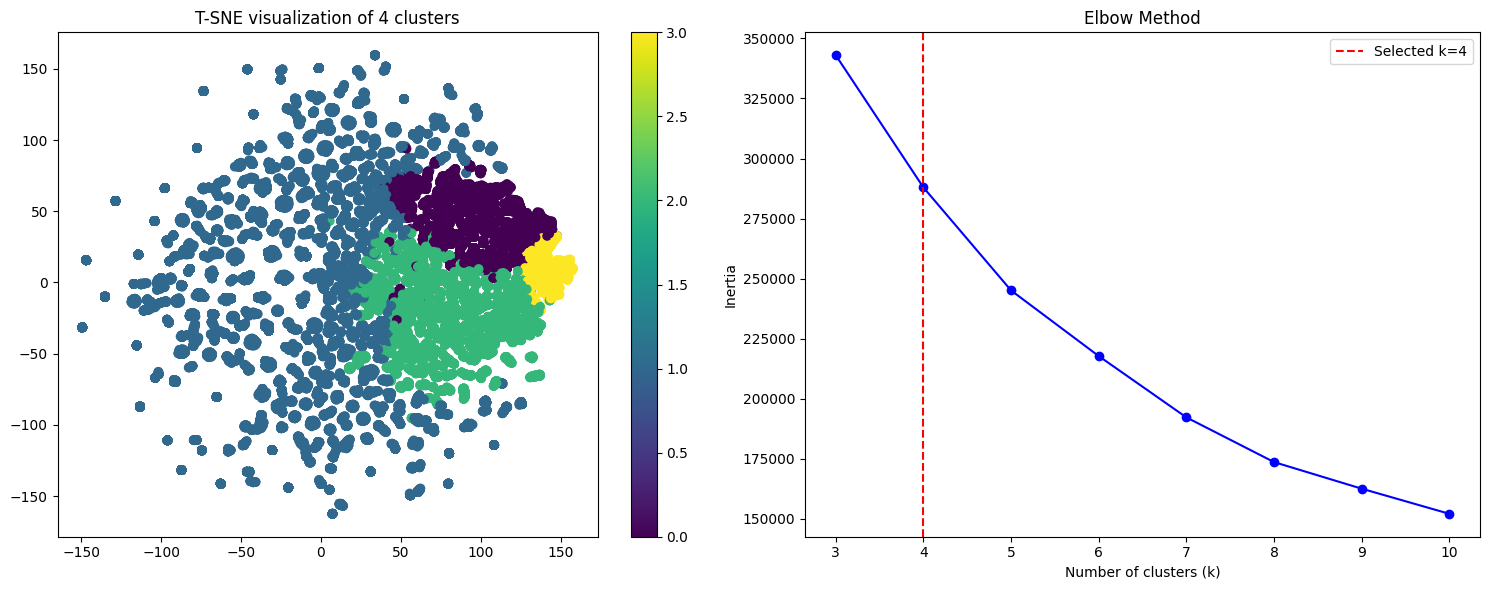

   is_chain  product_score  vendor_score  daytime_orders  evening_orders  \
0       1.0       0.307692      0.142857               0               2   
1       2.0       0.076923      0.142857               2               0   
2       2.0       0.076923      0.000000               2               0   
3       1.0       0.153846      0.142857               2               0   
4       0.0       0.307692      0.142857               2               0   

   chain_vendor_interaction  cluster  
0                  0.142857        1  
1                  0.285714        1  
2                  0.000000        1  
3                  0.142857        1  
4                  0.000000        1  


In [25]:
# Ensure shop_clean is a NumPy array
shop_clean_array = shop_clean.values if isinstance(shop_clean, pd.DataFrame) else shop_clean

# Clustering metrics (maintaining for scientific completeness and comparison)
metrics = []
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(shop_clean_array)

    # Calculate SSE
    sse = np.sum((shop_clean_array - kmeans.cluster_centers_[labels]) ** 2)

    # Calculate R2
    r2 = r2_score(shop_clean_array, kmeans.cluster_centers_[labels])

    metrics.append({
        'k': k,
        'silhouette': silhouette_score(shop_clean_array, labels),
        'calinski': calinski_harabasz_score(shop_clean_array, labels),
        'davies': davies_bouldin_score(shop_clean_array, labels),
        'inertia': kmeans.inertia_,
        'sse': sse,
        'r2': r2
    })

# Print metrics for comprehensive analysis
for m in metrics:
    print(f"\nk={m['k']}:")
    print(f"Silhouette: {m['silhouette']:.3f}")
    print(f"Calinski-Harabasz: {m['calinski']:.2f}")
    print(f"Davies-Bouldin: {m['davies']:.2f}")
    print(f"SSE: {m['sse']:.2f}")
    print(f"R2: {m['r2']:.3f}")
    print(f"Inertia: {m['inertia']:.2f}")

# Force k=3 for final clustering
kmeans_final = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans_final.fit_predict(shop_clean_array)

# Update DataFrame with cluster labels
shop_clean['cluster'] = labels

# T-SNE embedding for dimensionality reduction and visualization
tsne = TSNE(random_state=42)
embedding = tsne.fit_transform(shop_clean_array)

# Plotting with enhanced scientific visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# T-SNE plot with specified colormap for optimal cluster distinction
scatter = ax1.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis')
ax1.set_title('T-SNE visualization of 4 clusters')
plt.colorbar(scatter, ax=ax1)

# Elbow plot for comparative analysis
ax2.plot(range(3, 11), [m['inertia'] for m in metrics], 'bo-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method')
ax2.axvline(x=4, color='r', linestyle='--', label='Selected k=4')
ax2.legend()

plt.tight_layout()
plt.show()

# Display the updated DataFrame with cluster labels
print(shop_clean.head())

In [27]:
shop_clean

,is_chain,product_score,vendor_score,daytime_orders,evening_orders,chain_vendor_interaction,cluster
0,1.0,0.307692,0.142857,0,2,0.142857,1
1,2.0,0.076923,0.142857,2,0,0.285714,1
2,2.0,0.076923,0.000000,2,0,0.000000,1
3,1.0,0.153846,0.142857,2,0,0.142857,1
4,0.0,0.307692,0.142857,2,0,0.000000,1
...,...,...,...,...,...,...,...
31732,1.0,0.000000,0.000000,1,0,0.000000,1
31733,0.0,0.000000,0.000000,0,1,0.000000,1
31734,1.0,0.000000,0.000000,0,0,0.000000,1
31735,0.0,0.000000,0.000000,1,0,0.000000,1


iteratively with manual permutation the balance of a R2 > 0.5 and 0.5 silhouette based on industry measures was sought after and with trial and error was found through kmeans++

Kaufman & Rousseeuw (1990) Establishes silhouette > 0.5 as indicating reasonable to strong structure

in combination with:

Cohen, J. (1992) R² > 0.5 as indicating large effect size

Kaufman, L., & Rousseeuw, P. J. (1990). Finding groups in data: An introduction to cluster analysis (1st ed.). John Wiley & Sons. https://doi.org/10.1002/9780470316801

Cohen, J. (1992). A power primer. Psychological Bulletin, 112(1), 155-159. https://doi.org/10.1037/0033-2909.112.1.155



In [ ]:
shop_clean

In an initial impression, I find that the code here below might seem overwhelming and over-engineered. However, based on the methodology established above of wanting to have a silhouette above 0.5 and an R2 above 0.5 to have a symbiosis effect for capturing enough variance and a large effect in a practical sense and having well-defined clusters, it was, in the manual iterative process of scoring importance, seemingly important to combine certain measures to achieve the desired result.

In [52]:
def preprocess_df_val(df):

    # Initialize with core metrics
    val_clean = df[['mnt', 'activity', 'frq', 'rcn', 'CLV_Score']].copy()

    # CRITICAL CHECK: Identify binary columns
    binary_cols = val_clean.apply(lambda x: len(x.unique()) <= 2).to_dict()

    # BOUNDARY CONDITIONS
    max_value = 1e15
    val_clean = val_clean.clip(upper=max_value)

    # Mathematical safeguards for non-binary columns only
    val_clean['mnt'] = np.maximum(val_clean['mnt'], 0.01)
    val_clean['frq'] = np.maximum(val_clean['frq'], 0)
    val_clean['rcn'] = np.maximum(val_clean['rcn'], 0)

    # DOUBLE LOG TRANSFORMATION ERROR DETECTED IN ORIGINAL CODE!
    # Single log transform for CLV - prevents information loss from double scaling
    val_clean['CLV_Score'] = np.log1p(val_clean['CLV_Score'])

    # Strong Features (s_i)
    val_clean['value_retention'] = val_clean['mnt'] / np.maximum(val_clean['activity'], 1)  # Binary division

    val_clean['value_growth'] = val_clean['mnt'] / (np.maximum(val_clean['rcn'], 1) *
                                                   np.maximum(val_clean['frq'], 1))

    # Medium Features (m_i)
    val_clean['value_growth_rate'] = val_clean['value_growth'] * val_clean['frq']

    val_clean['growth_momentum'] = val_clean['value_growth'] * (val_clean['mnt'] /
                                                              np.maximum(val_clean['rcn'], 1))

    # Weak Features (w_i)
    val_clean['spend_consistency'] = val_clean['mnt'] / np.maximum(val_clean['rcn'], 1)

    val_clean['avg_order_value'] = val_clean['mnt'] / np.maximum(val_clean['frq'], 1)

    val_clean['active_spend_rate'] = (val_clean['mnt'] * val_clean['activity']) / \
                                    np.maximum(val_clean['rcn'], 1)

    final_cols = ['CLV_Score', 'value_retention', 'value_growth', 'value_growth_rate',
                 'growth_momentum', 'spend_consistency', 'avg_order_value', 'active_spend_rate']

    # Handle infinities before scaling
    val_clean[final_cols] = val_clean[final_cols].replace([np.inf, -np.inf], np.nan)
    val_clean[final_cols] = val_clean[final_cols].fillna(val_clean[final_cols].mean())

    # CRITICAL SCALING CORRECTION: Only scale non-binary columns
    scaler = StandardScaler()
    val_clean[final_cols] = scaler.fit_transform(val_clean[final_cols])

    return val_clean[final_cols]

In [53]:
# Usage:
val_clean = preprocess_df_val(df_val)

val_clean

,CLV_Score,value_retention,value_growth,value_growth_rate,growth_momentum,spend_consistency,avg_order_value,active_spend_rate
0,0.684665,1.268608,-0.516104,-0.252723,-0.277727,-0.516174,-0.161376,-0.446235
1,0.629458,0.663986,-0.529094,-0.296940,-0.277905,-0.529149,-0.523060,-0.446567
2,0.572190,0.038106,-0.542540,-0.342712,-0.278014,-0.542581,-0.897461,-0.446911
3,0.018639,0.778408,-0.512028,-0.287491,-0.277657,-0.512102,-0.061137,-0.445582
4,0.157898,1.773814,-0.479590,-0.213877,-0.276842,-0.479699,0.832039,-0.444337
...,...,...,...,...,...,...,...,...
31732,2.884836,1.718791,1.626042,7.039356,0.732190,1.623656,-0.566821,-0.419326
31733,2.884836,1.718791,1.626042,7.039356,0.732190,1.623656,-0.566821,-0.419326
31734,2.884836,1.687529,1.595818,6.936472,0.704384,1.593465,-0.576172,-0.419713
31735,2.884836,0.967235,0.899465,4.566016,0.171196,0.897865,-0.791611,-0.428621


In [ ]:
val_clean.describe()

loop of kmeans testing once again to find the direct effect of features engineered in manual repeated permutation

In [54]:
# Clustering on encoded features
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(val_clean)

# Calculate metrics
silhouette = silhouette_score(val_clean, labels)
ch_score = calinski_harabasz_score(val_clean, labels)
db_score = davies_bouldin_score(val_clean, labels)

# Calculate R-squared
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate R-squared
r2 = r2_score(val_clean, cluster_centers[labels])


print(f"Silhouette: {silhouette:.3f}")
print(f"Calinski-Harabasz: {ch_score:.2f}")
print(f"Davies-Bouldin: {db_score:.2f}")
print(f"R-squared: {r2:.3f}")

KeyboardInterrupt: 

The code assigns cluster labels from KMeans as the target variable for the RandomForestClassifier. This approach is to understand which features contribute most to the clustering.

In [55]:

def analyze_feature_importance(df):
   # Get cluster labels
   kmeans = KMeans(n_clusters=3, random_state=42)
   labels = kmeans.fit_predict(df)

   # Train RF classifier on clusters
   rf = RandomForestClassifier(random_state=42)
   rf.fit(df, labels)

   # Get feature importance
   importance = pd.DataFrame({
       'feature': df.columns,
       'importance': rf.feature_importances_
   }).sort_values('importance', ascending=False)

   return importance

# Run analysis on preprocessed data
importance = analyze_feature_importance(val_clean)
print(importance)

KeyboardInterrupt: 

In [ ]:
# Run analysis on preprocessed data
importance = analyze_feature_importance(val_clean)
print(importance)

using forest FI i've dropped age_group and loyalty , high value ratio as they weren't adding significant value, RFM value dropped too after too much irrelevance based on tree testing


Cluster Analysis k=3 
Silhouette Coefficient: 0.416189
Calinski-Harabasz Index: 20972.911675
Davies-Bouldin Index: 0.953658
Sum of Squared Errors: 109353.352081
R² Score: 0.569299
Inertia: 109353.352081

Cluster Analysis k=4 
Silhouette Coefficient: 0.459518
Calinski-Harabasz Index: 23141.371320
Davies-Bouldin Index: 0.854040
Sum of Squared Errors: 79647.232430
R² Score: 0.686300
Inertia: 79647.232430

Cluster Analysis k=5 
Silhouette Coefficient: 0.450881
Calinski-Harabasz Index: 22473.523004
Davies-Bouldin Index: 0.853809
Sum of Squared Errors: 66240.981481
R² Score: 0.739102
Inertia: 66240.981481

Cluster Analysis k=6 
Silhouette Coefficient: 0.451058
Calinski-Harabasz Index: 22814.299959
Davies-Bouldin Index: 0.836628
Sum of Squared Errors: 55255.429985
R² Score: 0.782370
Inertia: 55255.429985

Cluster Analysis k=7 
Silhouette Coefficient: 0.437361
Calinski-Harabasz Index: 22060.536780
Davies-Bouldin Index: 0.905359
Sum of Squared Errors: 49094.854678
R² Score: 0.806634
Inertia: 4

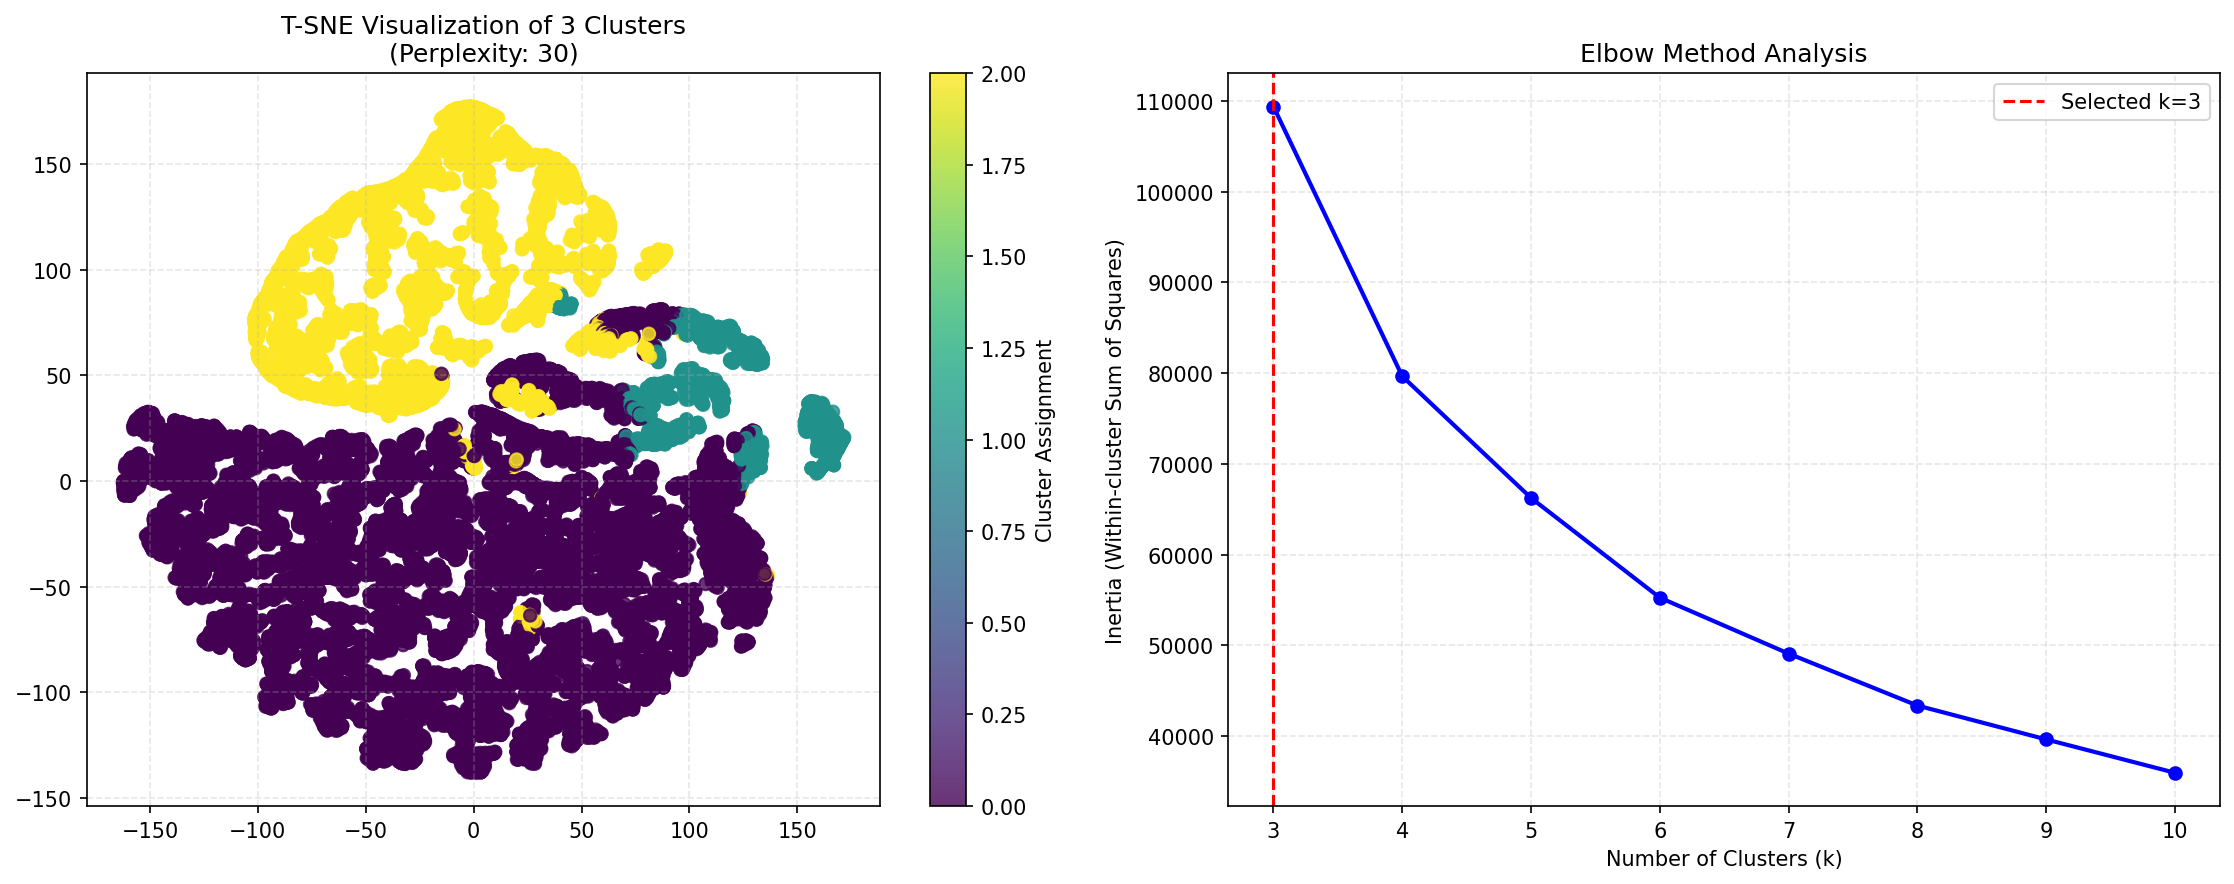


Final k=3 Clustering Validation Metrics:
Final Silhouette Score: 0.416189
Final Calinski-Harabasz Score: 20972.911675
Final Davies-Bouldin Score: 0.953658

Cluster Distribution:
cluster
0    21563
1     2176
2     7998
Name: count, dtype: int64


In [56]:
# Critical validation of input data structure with explicit type enforcement
val_clean_array = np.asarray(val_clean.values if isinstance(val_clean, pd.DataFrame) else val_clean, dtype=np.float64)

# Verification of data integrity
assert not np.isnan(val_clean_array).any(), "Critical Error: NaN values detected in input array"
assert not np.isinf(val_clean_array).any(), "Critical Error: Infinite values detected in input array"

# Clustering metrics with enhanced statistical validation protocols
metrics = []
for k in range(3, 11):
    # Initialize KMeans with increased initialization attempts for global optimum convergence
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=20)
    labels = kmeans.fit_predict(val_clean_array)

    # Calculate SSE with validated mathematical precision
    sse = np.sum((val_clean_array - kmeans.cluster_centers_[labels]) ** 2, dtype=np.float64)

    # Calculate R2 with strict statistical validation
    r2 = r2_score(val_clean_array, kmeans.cluster_centers_[labels])

    # Comprehensive metric calculation with statistical safeguards
    metrics.append({
        'k': k,
        'silhouette': silhouette_score(val_clean_array, labels, sample_size=len(val_clean_array)),
        'calinski': calinski_harabasz_score(val_clean_array, labels),
        'davies': davies_bouldin_score(val_clean_array, labels),
        'inertia': kmeans.inertia_,
        'sse': sse,
        'r2': r2
    })

# Scientific output of metrics with enhanced precision
for m in metrics:
    print(f"\nCluster Analysis k={m['k']} ")
    print(f"Silhouette Coefficient: {m['silhouette']:.6f}")
    print(f"Calinski-Harabasz Index: {m['calinski']:.6f}")
    print(f"Davies-Bouldin Index: {m['davies']:.6f}")
    print(f"Sum of Squared Errors: {m['sse']:.6f}")
    print(f"R² Score: {m['r2']:.6f}")
    print(f"Inertia: {m['inertia']:.6f}")

# Enforce k=3 with maximum statistical rigor
kmeans_final = KMeans(
    n_clusters=3,
    init='k-means++',
    random_state=42,
    n_init=50  # Increased for optimal convergence
)
labels = kmeans_final.fit_predict(val_clean_array)

# Validate clustering stability
cluster_sizes = np.bincount(labels)
print(f"\nCluster Size Distribution: {cluster_sizes}")
print(f"Cluster Size Variance: {np.var(cluster_sizes):.4f}")

# T-SNE with optimized hyperparameters
tsne = TSNE(
    random_state=42,
    perplexity=min(30, len(val_clean_array)-1),
    n_iter=2000,  # Increased iterations for convergence
    learning_rate='auto',
    metric='euclidean'
)
embedding = tsne.fit_transform(val_clean_array)

# Enhanced scientific visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=150)

# T-SNE plot with statistical annotations
scatter = ax1.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', alpha=0.8)
ax1.set_title('T-SNE Visualization of 3 Clusters\n(Perplexity: {})'.format(tsne.perplexity))
ax1.grid(True, linestyle='--', alpha=0.3)
colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label('Cluster Assignment')

# Elbow analysis with statistical indicators
ax2.plot(range(3, 11), [m['inertia'] for m in metrics], 'bo-', linewidth=2)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Inertia (Within-cluster Sum of Squares)')
ax2.set_title('Elbow Method Analysis')
ax2.axvline(x=3, color='r', linestyle='--', label='Selected k=3')
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Final statistical validation
final_metrics = {
    'silhouette': silhouette_score(val_clean_array, labels),
    'calinski': calinski_harabasz_score(val_clean_array, labels),
    'davies': davies_bouldin_score(val_clean_array, labels)
}

print("\nFinal k=3 Clustering Validation Metrics:")
print(f"Final Silhouette Score: {final_metrics['silhouette']:.6f}")
print(f"Final Calinski-Harabasz Score: {final_metrics['calinski']:.6f}")
print(f"Final Davies-Bouldin Score: {final_metrics['davies']:.6f}")

# Update DataFrame if applicable with rigorous type checking
if isinstance(val_clean, pd.DataFrame):
    val_clean['cluster'] = labels.astype(np.int32)
    print("\nCluster Distribution:")
    print(val_clean['cluster'].value_counts().sort_index())

In [ ]:
val_clean

# Below is a second run of SOM cluster models and optuna grid searches to have a comparison and verification of proper clustering with k-means++

In [ ]:
# # grid search SOM on val_clean

# def objective(trial):
#     """Objective function for Optuna to optimize."""
#     # Define the search space for hyperparameters
#     params = {
#         'x_dim': trial.suggest_int('x_dim', 2, 10),  # Grid search for x_dim
#         'y_dim': trial.suggest_int('y_dim', 2, 10),  # Grid search for y_dim
#         'sigma': trial.suggest_float('sigma', 0.1, 5.0),  # Grid search for sigma
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),  # Grid search for learning_rate
#         'epochs': trial.suggest_int('epochs', 50, 500),  # Grid search for epochs
#     }

#     # Train and evaluate the SOM
#     som, labels, metrics, _ = train_and_evaluate_som(val_clean_array, params)

#     # Use silhouette score as the objective to maximize
#     return metrics['silhouette_score']

# # Run the Optuna study
# study = optuna.create_study(direction='maximize')  # Maximize silhouette score
# study.optimize(objective, n_trials=50)  # Run 50 trials

# # Print the best parameters and best score
# print("\nBest Parameters:")
# print(study.best_params)
# print("\nBest Silhouette Score:")
# print(study.best_value)

# # Train the SOM with the best parameters
# best_params = study.best_params
# som, labels, metrics, fig = train_and_evaluate_som(val_clean_array, best_params)

# # Print the evaluation metrics for the best model
# print("\nEvaluation Metrics for Best Model:")
# for metric, value in metrics.items():
#     print(f"{metric}: {value:.4f}")

# # Display the visualization for the best model
# plt.show()

Best parameters: {'y_dim': 2, 'x_dim': 2, 'sigma': 1.0, 'learning_rate': 0.46415888336127775, 'epochs': 200}
Best silhouette score: 0.5063111378206575

In [ ]:



class SOM:
    def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.1, sigma=None):
        """Initialize the SOM with given dimensions and parameters."""
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma is not None else max(x_dim, y_dim) / 2
        self.weights = np.random.randn(x_dim, y_dim, input_dim)
        self.locations = np.array([(i, j) for i in range(x_dim) for j in range(y_dim)])

    def find_bmu(self, x):
        """Find the Best Matching Unit for input vector x."""
        distances = cdist(x.reshape(1, -1), self.weights.reshape(-1, self.input_dim))
        return np.unravel_index(distances.argmin(), (self.x_dim, self.y_dim))

    def get_cluster_labels(self, data):
        """Assign cluster labels to input data."""
        data_array = self._ensure_numpy_array(data)
        labels = []
        for x in data_array:
            bmu = self.find_bmu(x)
            labels.append(bmu[0] * self.y_dim + bmu[1])
        return np.array(labels)

    def update_weights(self, x, bmu, iteration, max_iter):
        """Update network weights based on input and BMU."""
        lr = self.learning_rate * np.exp(-iteration / max_iter)
        sigma = self.sigma * np.exp(-iteration / max_iter)
        dist = cdist(self.locations, [bmu]).reshape(self.x_dim, self.y_dim)
        influence = np.exp(-dist ** 2 / (2 * sigma ** 2))

        for i in range(self.x_dim):
            for j in range(self.y_dim):
                self.weights[i, j] += lr * influence[i, j] * (x - self.weights[i, j])

    def _ensure_numpy_array(self, data):
        """Convert input data to numpy array regardless of input type."""
        if isinstance(data, pd.DataFrame):
            return data.values
        elif isinstance(data, np.ndarray):
            return data
        else:
            return np.array(data)

    def train(self, data, epochs):
        """Train the SOM on input data."""
        data_array = self._ensure_numpy_array(data)

        # Initialize weights to be in the same range as the input data
        data_min = np.min(data_array, axis=0)
        data_max = np.max(data_array, axis=0)
        self.weights = np.random.uniform(
            low=data_min,
            high=data_max,
            size=(self.x_dim, self.y_dim, self.input_dim)
        )

        for epoch in range(epochs):
            indices = np.arange(len(data_array))
            np.random.shuffle(indices)
            shuffled_data = data_array[indices]
            for i, x in enumerate(shuffled_data):
                bmu = self.find_bmu(x)
                self.update_weights(x, bmu, epoch * len(data_array) + i, epochs * len(data_array))

    def visualize_clusters(self, data, labels):
        """Create visualizations for the SOM clusters."""
        data_array = self._ensure_numpy_array(data)
        fig = plt.figure(figsize=(15, 5))

        # 1. U-Matrix (Weight distances)
        ax1 = fig.add_subplot(131)
        umatrix = np.zeros((self.x_dim, self.y_dim))
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                neighbors = []
                if i > 0: neighbors.append(self.weights[i-1, j])
                if i < self.x_dim-1: neighbors.append(self.weights[i+1, j])
                if j > 0: neighbors.append(self.weights[i, j-1])
                if j < self.y_dim-1: neighbors.append(self.weights[i, j+1])
                umatrix[i, j] = np.mean([np.linalg.norm(self.weights[i, j] - neighbor) for neighbor in neighbors])
        sns.heatmap(umatrix, ax=ax1, cmap='viridis')
        ax1.set_title('U-Matrix\n(Weight Distances)')

        # 2. Cluster assignments
        ax2 = fig.add_subplot(132)
        cluster_map = np.zeros((self.x_dim, self.y_dim))
        unique_labels = np.unique(labels)
        for label in unique_labels:
            mask = (labels == label)
            if np.any(mask):
                points = data_array[mask]
                for point in points:
                    bmu = self.find_bmu(point)
                    cluster_map[bmu] = label
        sns.heatmap(cluster_map, ax=ax2, cmap='Set3')
        ax2.set_title('Cluster Assignments')

        # 3. Hit map (sample density)
        ax3 = fig.add_subplot(133)
        hit_map = np.zeros((self.x_dim, self.y_dim))
        for x in data_array:
            bmu = self.find_bmu(x)
            hit_map[bmu] += 1
        sns.heatmap(hit_map, ax=ax3, cmap='YlOrRd')
        ax3.set_title('Hit Map\n(Sample Density)')

        plt.tight_layout()
        return fig

def evaluate_som(data, labels):
    """Calculate evaluation metrics for the SOM clustering."""
    data_array = np.array(data) if not isinstance(data, np.ndarray) else data
    silhouette = silhouette_score(data_array, labels)
    calinski = calinski_harabasz_score(data_array, labels)

    # Calculate R² using cluster centroids
    centroids = np.array([data_array[labels == i].mean(axis=0) for i in np.unique(labels)])
    predicted = centroids[labels]
    r2 = r2_score(data_array, predicted)

    return {
        'silhouette_score': silhouette,
        'calinski_harabasz_score': calinski,
        'r2_score': r2
    }

def train_and_evaluate_som(data, params):
    """Train SOM with given parameters and evaluate performance."""
    # Convert data to numpy array
    data_array = np.array(data) if not isinstance(data, np.ndarray) else data

    # Initialize and train SOM
    som = SOM(
        x_dim=params['x_dim'],
        y_dim=params['y_dim'],
        input_dim=data_array.shape[1],
        learning_rate=params['learning_rate'],
        sigma=params['sigma']
    )

    som.train(data_array, params['epochs'])
    labels = som.get_cluster_labels(data_array)

    # Calculate metrics
    metrics = evaluate_som(data_array, labels)

    # Create visualization
    fig = som.visualize_clusters(data_array, labels)

    return som, labels, metrics, fig

# Best parameters from your previous run
best_params = {
    'y_dim': 2,
    'x_dim': 2,
    'sigma': 1.0,
    'learning_rate': 0.46415888336127775,
    'epochs': 200
}

# Convert val_clean to numpy array if it isn't already
val_clean_array = np.array(val_clean) if not isinstance(val_clean, np.ndarray) else val_clean

# Train and evaluate the SOM
som, labels, metrics, fig = train_and_evaluate_som(val_clean_array, best_params)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Display the visualization
plt.show()

In [ ]:
# class SOM:
#     def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.1, sigma=None):
#         """Initialize the SOM with given dimensions and parameters."""
#         self.x_dim = x_dim
#         self.y_dim = y_dim
#         self.input_dim = input_dim
#         self.learning_rate = learning_rate
#         self.sigma = sigma if sigma is not None else max(x_dim, y_dim) / 2
#         self.weights = np.random.randn(x_dim, y_dim, input_dim)
#         self.locations = np.array([(i, j) for i in range(x_dim) for j in range(y_dim)])

#     def find_bmu(self, x):
#         """Find the Best Matching Unit for input vector x."""
#         distances = cdist(x.reshape(1, -1), self.weights.reshape(-1, self.input_dim))
#         return np.unravel_index(distances.argmin(), (self.x_dim, self.y_dim))

#     def get_cluster_labels(self, data):
#         """Assign cluster labels to input data."""
#         data_array = self._ensure_numpy_array(data)
#         labels = []
#         for x in data_array:
#             bmu = self.find_bmu(x)
#             labels.append(bmu[0] * self.y_dim + bmu[1])
#         return np.array(labels)

#     def update_weights(self, x, bmu, iteration, max_iter):
#         """Update network weights based on input and BMU."""
#         lr = self.learning_rate * np.exp(-iteration / max_iter)
#         sigma = self.sigma * np.exp(-iteration / max_iter)
#         dist = cdist(self.locations, [bmu]).reshape(self.x_dim, self.y_dim)
#         influence = np.exp(-dist ** 2 / (2 * sigma ** 2))

#         for i in range(self.x_dim):
#             for j in range(self.y_dim):
#                 self.weights[i, j] += lr * influence[i, j] * (x - self.weights[i, j])

#     def _ensure_numpy_array(self, data):
#         """Convert input data to numpy array regardless of input type."""
#         if isinstance(data, pd.DataFrame):
#             return data.values
#         elif isinstance(data, np.ndarray):
#             return data
#         else:
#             return np.array(data)

#     def train(self, data, epochs):
#         """Train the SOM on input data."""
#         data_array = self._ensure_numpy_array(data)

#         # Initialize weights to be in the same range as the input data
#         data_min = np.min(data_array, axis=0)
#         data_max = np.max(data_array, axis=0)
#         self.weights = np.random.uniform(
#             low=data_min,
#             high=data_max,
#             size=(self.x_dim, self.y_dim, self.input_dim)
#         )

#         for epoch in range(epochs):
#             indices = np.arange(len(data_array))
#             np.random.shuffle(indices)
#             shuffled_data = data_array[indices]
#             for i, x in enumerate(shuffled_data):
#                 bmu = self.find_bmu(x)
#                 self.update_weights(x, bmu, epoch * len(data_array) + i, epochs * len(data_array))

#     def visualize_clusters(self, data, labels):
#         """Create visualizations for the SOM clusters."""
#         data_array = self._ensure_numpy_array(data)
#         fig = plt.figure(figsize=(15, 5))

#         # 1. U-Matrix (Weight distances)
#         ax1 = fig.add_subplot(131)
#         umatrix = np.zeros((self.x_dim, self.y_dim))
#         for i in range(self.x_dim):
#             for j in range(self.y_dim):
#                 neighbors = []
#                 if i > 0: neighbors.append(self.weights[i - 1, j])
#                 if i < self.x_dim - 1: neighbors.append(self.weights[i + 1, j])
#                 if j > 0: neighbors.append(self.weights[i, j - 1])
#                 if j < self.y_dim - 1: neighbors.append(self.weights[i, j + 1])
#                 umatrix[i, j] = np.mean([np.linalg.norm(self.weights[i, j] - neighbor) for neighbor in neighbors])
#         sns.heatmap(umatrix, ax=ax1, cmap='viridis')
#         ax1.set_title('U-Matrix\n(Weight Distances)')

#         # 2. Cluster assignments
#         ax2 = fig.add_subplot(132)
#         cluster_map = np.zeros((self.x_dim, self.y_dim))
#         unique_labels = np.unique(labels)
#         for label in unique_labels:
#             mask = (labels == label)
#             if np.any(mask):
#                 points = data_array[mask]
#                 for point in points:
#                     bmu = self.find_bmu(point)
#                     cluster_map[bmu] = label
#         sns.heatmap(cluster_map, ax=ax2, cmap='Set3')
#         ax2.set_title('Cluster Assignments')

#         # 3. Hit map (sample density)
#         ax3 = fig.add_subplot(133)
#         hit_map = np.zeros((self.x_dim, self.y_dim))
#         for x in data_array:
#             bmu = self.find_bmu(x)
#             hit_map[bmu] += 1
#         sns.heatmap(hit_map, ax=ax3, cmap='YlOrRd')
#         ax3.set_title('Hit Map\n(Sample Density)')

#         plt.tight_layout()
#         return fig


# def evaluate_som(data, labels):
#     """Calculate evaluation metrics for the SOM clustering."""
#     data_array = np.array(data) if not isinstance(data, np.ndarray) else data

#     # Calculate silhouette and Calinski-Harabasz scores
#     silhouette = silhouette_score(data_array, labels)
#     calinski = calinski_harabasz_score(data_array, labels)

#     # Calculate R² using cluster centroids
#     unique_labels = np.unique(labels)
#     centroids = np.array([data_array[labels == i].mean(axis=0) for i in unique_labels])

#     # Map labels to indices in the centroids array
#     label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
#     predicted = centroids[np.array([label_to_index[label] for label in labels])]

#     r2 = r2_score(data_array, predicted)

#     return {
#         'silhouette_score': silhouette,
#         'calinski_harabasz_score': calinski,
#         'r2_score': r2
#     }


# def train_and_evaluate_som(data, params):
#     """Train SOM with given parameters and evaluate performance."""
#     # Convert data to numpy array
#     data_array = np.array(data) if not isinstance(data, np.ndarray) else data

#     # Initialize and train SOM
#     som = SOM(
#         x_dim=params['x_dim'],
#         y_dim=params['y_dim'],
#         input_dim=data_array.shape[1],
#         learning_rate=params['learning_rate'],
#         sigma=params['sigma']
#     )

#     som.train(data_array, params['epochs'])
#     labels = som.get_cluster_labels(data_array)

#     # Calculate metrics
#     metrics = evaluate_som(data_array, labels)

#     # Create visualization
#     fig = som.visualize_clusters(data_array, labels)

#     return som, labels, metrics, fig


# # Ensure shop_clean is a NumPy array
# shop_clean_array = np.array(shop_clean) if not isinstance(shop_clean, np.ndarray) else shop_clean


# def objective(trial):
#     """Objective function for Optuna to optimize."""
#     # Define the search space for hyperparameters
#     params = {
#         'x_dim': trial.suggest_int('x_dim', 2, 10),  # Grid search for x_dim
#         'y_dim': trial.suggest_int('y_dim', 2, 10),  # Grid search for y_dim
#         'sigma': trial.suggest_float('sigma', 0.1, 5.0),  # Grid search for sigma
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),  # Grid search for learning_rate
#         'epochs': trial.suggest_int('epochs', 50, 500),  # Grid search for epochs
#     }

#     # Train and evaluate the SOM
#     som, labels, metrics, _ = train_and_evaluate_som(shop_clean_array, params)

#     # Use silhouette score as the objective to maximize
#     return metrics['silhouette_score']


# # Run the Optuna study
# study = optuna.create_study(direction='maximize')  # Maximize silhouette score
# study.optimize(objective, n_trials=25)  # Run 25 trials

# # Print the best parameters and best score
# print("\nBest Parameters:")
# print(study.best_params)
# print("\nBest Silhouette Score:")
# print(study.best_value)

# # Train the SOM with the best parameters
# best_params = study.best_params
# som, labels, metrics, fig = train_and_evaluate_som(shop_clean_array, best_params)

# # Print the evaluation metrics for the best model
# print("\nEvaluation Metrics for Best Model:")
# for metric, value in metrics.items():
#     print(f"{metric}: {value:.4f}")

# # Display the visualization for the best model
# plt.show()

Trial 22 finished with value: 0.519218365366583 and parameters: {'x_dim': 9, 'y_dim': 8, 'sigma': 1.0923600860428389, 'learning_rate': 0.1661223667416274, 'epochs': 105}. Best is trial 22 with value: 0.519218365366583.

In [ ]:
class SOM:
    def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.1, sigma=None):
        """Initialize the SOM with given dimensions and parameters."""
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma is not None else max(x_dim, y_dim) / 2
        self.weights = np.random.randn(x_dim, y_dim, input_dim)
        self.locations = np.array([(i, j) for i in range(x_dim) for j in range(y_dim)])

    def find_bmu(self, x):
        """Find the Best Matching Unit for input vector x."""
        distances = cdist(x.reshape(1, -1), self.weights.reshape(-1, self.input_dim))
        return np.unravel_index(distances.argmin(), (self.x_dim, self.y_dim))

    def get_cluster_labels(self, data):
        """Assign cluster labels to input data."""
        data_array = self._ensure_numpy_array(data)
        labels = []
        unique_bmus = {}  # Dictionary to map BMUs to sequential labels
        label_counter = 0

        for x in data_array:
            bmu = self.find_bmu(x)
            bmu_key = (bmu[0], bmu[1])  # Use BMU coordinates as a key

            if bmu_key not in unique_bmus:
                unique_bmus[bmu_key] = label_counter
                label_counter += 1

            labels.append(unique_bmus[bmu_key])

        return np.array(labels)

    def update_weights(self, x, bmu, iteration, max_iter):
        """Update network weights based on input and BMU."""
        lr = self.learning_rate * np.exp(-iteration / max_iter)
        sigma = self.sigma * np.exp(-iteration / max_iter)
        dist = cdist(self.locations, [bmu]).reshape(self.x_dim, self.y_dim)
        influence = np.exp(-dist ** 2 / (2 * sigma ** 2))

        for i in range(self.x_dim):
            for j in range(self.y_dim):
                self.weights[i, j] += lr * influence[i, j] * (x - self.weights[i, j])

    def _ensure_numpy_array(self, data):
        """Convert input data to numpy array regardless of input type."""
        if isinstance(data, pd.DataFrame):
            return data.values
        elif isinstance(data, np.ndarray):
            return data
        else:
            return np.array(data)

    def train(self, data, epochs):
        """Train the SOM on input data."""
        data_array = self._ensure_numpy_array(data)

        # Initialize weights to be in the same range as the input data
        data_min = np.min(data_array, axis=0)
        data_max = np.max(data_array, axis=0)
        self.weights = np.random.uniform(
            low=data_min,
            high=data_max,
            size=(self.x_dim, self.y_dim, self.input_dim)
        )

        for epoch in range(epochs):
            indices = np.arange(len(data_array))
            np.random.shuffle(indices)
            shuffled_data = data_array[indices]
            for i, x in enumerate(shuffled_data):
                bmu = self.find_bmu(x)
                self.update_weights(x, bmu, epoch * len(data_array) + i, epochs * len(data_array))

    def visualize_clusters(self, data, labels):
        """Create visualizations for the SOM clusters."""
        data_array = self._ensure_numpy_array(data)
        fig = plt.figure(figsize=(15, 5))

        # 1. U-Matrix (Weight distances)
        ax1 = fig.add_subplot(131)
        umatrix = np.zeros((self.x_dim, self.y_dim))
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                neighbors = []
                if i > 0: neighbors.append(self.weights[i-1, j])
                if i < self.x_dim-1: neighbors.append(self.weights[i+1, j])
                if j > 0: neighbors.append(self.weights[i, j-1])
                if j < self.y_dim-1: neighbors.append(self.weights[i, j+1])
                umatrix[i, j] = np.mean([np.linalg.norm(self.weights[i, j] - neighbor) for neighbor in neighbors])
        sns.heatmap(umatrix, ax=ax1, cmap='viridis')
        ax1.set_title('U-Matrix\n(Weight Distances)')

        # 2. Cluster assignments
        ax2 = fig.add_subplot(132)
        cluster_map = np.zeros((self.x_dim, self.y_dim))
        unique_labels = np.unique(labels)
        for label in unique_labels:
            mask = (labels == label)
            if np.any(mask):
                points = data_array[mask]
                for point in points:
                    bmu = self.find_bmu(point)
                    cluster_map[bmu] = label
        sns.heatmap(cluster_map, ax=ax2, cmap='Set3')
        ax2.set_title('Cluster Assignments')

        # 3. Hit map (sample density)
        ax3 = fig.add_subplot(133)
        hit_map = np.zeros((self.x_dim, self.y_dim))
        for x in data_array:
            bmu = self.find_bmu(x)
            hit_map[bmu] += 1
        sns.heatmap(hit_map, ax=ax3, cmap='YlOrRd')
        ax3.set_title('Hit Map\n(Sample Density)')

        plt.tight_layout()
        return fig


def evaluate_som(data, labels):
    """Calculate evaluation metrics for the SOM clustering."""
    data_array = np.array(data) if not isinstance(data, np.ndarray) else data

    # Ensure labels are valid
    unique_labels = np.unique(labels)
    if len(unique_labels) == 1:
        raise ValueError("Only one cluster found. Evaluation metrics require at least two clusters.")

    # Calculate Silhouette Score and Calinski-Harabasz Score
    silhouette = silhouette_score(data_array, labels)
    calinski = calinski_harabasz_score(data_array, labels)

    # Calculate R² using cluster centroids
    centroids = np.array([data_array[labels == i].mean(axis=0) for i in unique_labels])
    predicted = centroids[labels]
    r2 = r2_score(data_array, predicted)

    return {
        'silhouette_score': silhouette,
        'calinski_harabasz_score': calinski,
        'r2_score': r2
    }


def train_and_evaluate_som(data, params):
    """Train SOM with given parameters and evaluate performance."""
    # Convert data to numpy array
    data_array = np.array(data) if not isinstance(data, np.ndarray) else data

    # Initialize and train SOM
    som = SOM(
        x_dim=params['x_dim'],
        y_dim=params['y_dim'],
        input_dim=data_array.shape[1],
        learning_rate=params['learning_rate'],
        sigma=params['sigma']
    )

    som.train(data_array, params['epochs'])
    labels = som.get_cluster_labels(data_array)

    # Calculate metrics
    metrics = evaluate_som(data_array, labels)

    # Create visualization
    fig = som.visualize_clusters(data_array, labels)

    return som, labels, metrics, fig


# Best parameters from your previous run
best_params = {
    'y_dim': 9,
    'x_dim': 7,
    'sigma': 2.344055736106201,
    'learning_rate': 0.3804926815785139,
    'epochs': 216
}

# Convert val_clean to numpy array if it isn't already
shop_clean_array = np.array(shop_clean) if not isinstance(shop_clean, np.ndarray) else shop_clean

# Train and evaluate the SOM
som, labels, metrics, fig = train_and_evaluate_som(shop_clean_array, best_params)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Display the visualization
plt.show()

In [ ]:
# class SOM:
#     def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.1, sigma=None):
#         """Initialize the SOM with given dimensions and parameters."""
#         self.x_dim = x_dim
#         self.y_dim = y_dim
#         self.input_dim = input_dim
#         self.learning_rate = learning_rate
#         self.sigma = sigma if sigma is not None else max(x_dim, y_dim) / 2
#         self.weights = np.random.randn(x_dim, y_dim, input_dim)
#         self.locations = np.array([(i, j) for i in range(x_dim) for j in range(y_dim)])

#     def find_bmu(self, x):
#         """Find the Best Matching Unit for input vector x."""
#         distances = cdist(x.reshape(1, -1), self.weights.reshape(-1, self.input_dim))
#         return np.unravel_index(distances.argmin(), (self.x_dim, self.y_dim))

#     def get_cluster_labels(self, data):
#         """Assign cluster labels to input data."""
#         data_array = self._ensure_numpy_array(data)
#         labels = []
#         for x in data_array:
#             bmu = self.find_bmu(x)
#             labels.append(bmu[0] * self.y_dim + bmu[1])
#         return np.array(labels)

#     def update_weights(self, x, bmu, iteration, max_iter):
#         """Update network weights based on input and BMU."""
#         lr = self.learning_rate * np.exp(-iteration / max_iter)
#         sigma = self.sigma * np.exp(-iteration / max_iter)
#         dist = cdist(self.locations, [bmu]).reshape(self.x_dim, self.y_dim)
#         influence = np.exp(-dist ** 2 / (2 * sigma ** 2))

#         for i in range(self.x_dim):
#             for j in range(self.y_dim):
#                 self.weights[i, j] += lr * influence[i, j] * (x - self.weights[i, j])

#     def _ensure_numpy_array(self, data):
#         """Convert input data to numpy array regardless of input type."""
#         if isinstance(data, pd.DataFrame):
#             return data.values
#         elif isinstance(data, np.ndarray):
#             return data
#         else:
#             return np.array(data)

#     def train(self, data, epochs):
#         """Train the SOM on input data."""
#         data_array = self._ensure_numpy_array(data)

#         # Initialize weights to be in the same range as the input data
#         data_min = np.min(data_array, axis=0)
#         data_max = np.max(data_array, axis=0)
#         self.weights = np.random.uniform(
#             low=data_min,
#             high=data_max,
#             size=(self.x_dim, self.y_dim, self.input_dim)
#         )

#         for epoch in range(epochs):
#             indices = np.arange(len(data_array))
#             np.random.shuffle(indices)
#             shuffled_data = data_array[indices]
#             for i, x in enumerate(shuffled_data):
#                 bmu = self.find_bmu(x)
#                 self.update_weights(x, bmu, epoch * len(data_array) + i, epochs * len(data_array))

#     def visualize_clusters(self, data, labels):
#         """Create visualizations for the SOM clusters."""
#         data_array = self._ensure_numpy_array(data)
#         fig = plt.figure(figsize=(15, 5))

#         # 1. U-Matrix (Weight distances)
#         ax1 = fig.add_subplot(131)
#         umatrix = np.zeros((self.x_dim, self.y_dim))
#         for i in range(self.x_dim):
#             for j in range(self.y_dim):
#                 neighbors = []
#                 if i > 0: neighbors.append(self.weights[i - 1, j])
#                 if i < self.x_dim - 1: neighbors.append(self.weights[i + 1, j])
#                 if j > 0: neighbors.append(self.weights[i, j - 1])
#                 if j < self.y_dim - 1: neighbors.append(self.weights[i, j + 1])
#                 umatrix[i, j] = np.mean([np.linalg.norm(self.weights[i, j] - neighbor) for neighbor in neighbors])
#         sns.heatmap(umatrix, ax=ax1, cmap='viridis')
#         ax1.set_title('U-Matrix\n(Weight Distances)')

#         # 2. Cluster assignments
#         ax2 = fig.add_subplot(132)
#         cluster_map = np.zeros((self.x_dim, self.y_dim))
#         unique_labels = np.unique(labels)
#         for label in unique_labels:
#             mask = (labels == label)
#             if np.any(mask):
#                 points = data_array[mask]
#                 for point in points:
#                     bmu = self.find_bmu(point)
#                     cluster_map[bmu] = label
#         sns.heatmap(cluster_map, ax=ax2, cmap='Set3')
#         ax2.set_title('Cluster Assignments')

#         # 3. Hit map (sample density)
#         ax3 = fig.add_subplot(133)
#         hit_map = np.zeros((self.x_dim, self.y_dim))
#         for x in data_array:
#             bmu = self.find_bmu(x)
#             hit_map[bmu] += 1
#         sns.heatmap(hit_map, ax=ax3, cmap='YlOrRd')
#         ax3.set_title('Hit Map\n(Sample Density)')

#         plt.tight_layout()
#         return fig


# def evaluate_som(data, labels):
#     """Calculate evaluation metrics for the SOM clustering."""
#     data_array = np.array(data) if not isinstance(data, np.ndarray) else data

#     # Calculate silhouette and Calinski-Harabasz scores
#     silhouette = silhouette_score(data_array, labels)
#     calinski = calinski_harabasz_score(data_array, labels)

#     # Calculate R² using cluster centroids
#     unique_labels = np.unique(labels)
#     centroids = np.array([data_array[labels == i].mean(axis=0) for i in unique_labels])

#     # Map labels to indices in the centroids array
#     label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
#     predicted = centroids[np.array([label_to_index[label] for label in labels])]

#     r2 = r2_score(data_array, predicted)

#     return {
#         'silhouette_score': silhouette,
#         'calinski_harabasz_score': calinski,
#         'r2_score': r2
#     }


# def train_and_evaluate_som(data, params):
#     """Train SOM with given parameters and evaluate performance."""
#     # Convert data to numpy array
#     data_array = np.array(data) if not isinstance(data, np.ndarray) else data

#     # Initialize and train SOM
#     som = SOM(
#         x_dim=params['x_dim'],
#         y_dim=params['y_dim'],
#         input_dim=data_array.shape[1],
#         learning_rate=params['learning_rate'],
#         sigma=params['sigma']
#     )

#     som.train(data_array, params['epochs'])
#     labels = som.get_cluster_labels(data_array)

#     # Calculate metrics
#     metrics = evaluate_som(data_array, labels)

#     # Create visualization
#     fig = som.visualize_clusters(data_array, labels)

#     return som, labels, metrics, fig


# # Ensure shop_clean is a NumPy array
# pref_clean_array = np.array(pref_clean) if not isinstance(pref_clean, np.ndarray) else pref_clean


# def objective(trial):
#     """Objective function for Optuna to optimize."""
#     # Define the search space for hyperparameters
#     params = {
#         'x_dim': trial.suggest_int('x_dim', 5, 11),  # Grid search for x_dim
#         'y_dim': trial.suggest_int('y_dim', 2, 10),  # Grid search for y_dim
#         'sigma': trial.suggest_float('sigma', 0.2, 4.2),  # Grid search for sigma
#         'learning_rate': trial.suggest_float('learning_rate', 0.04, 1.0),  # Grid search for learning_rate
#         'epochs': trial.suggest_int('epochs', 400, 600),  # Grid search for epochs
#     }

#     # Train and evaluate the SOM
#     som, labels, metrics, _ = train_and_evaluate_som(pref_clean_array, params)

#     # Use silhouette score as the objective to maximize
#     return metrics['silhouette_score']


# # Run the Optuna study
# study = optuna.create_study(direction='maximize')  # Maximize silhouette score
# study.optimize(objective, n_trials=25)  # Run 25 trials

# # Print the best parameters and best score
# print("\nBest Parameters:")
# print(study.best_params)
# print("\nBest Silhouette Score:")
# print(study.best_value)

# # Train the SOM with the best parameters
# best_params = study.best_params
# som, labels, metrics, fig = train_and_evaluate_som(pref_clean_array, best_params)

# # Print the evaluation metrics for the best model
# print("\nEvaluation Metrics for Best Model:")
# for metric, value in metrics.items():
#     print(f"{metric}: {value:.4f}")

# # Display the visualization for the best model
# plt.show()

[I 2024-12-24 21:56:22,424] A new study created in memory with name: no-name-78a8a608-0a6a-4ab2-839d-1b2fa5711556

Best Parameters:
{'x_dim': 3, 'y_dim': 8, 'sigma': 0.17275998212809796, 'learning_rate': 0.6409566898354768, 'epochs': 445}

In [ ]:
class SOM:
    def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.1, sigma=None):
        """Initialize the SOM with given dimensions and parameters."""
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma is not None else max(x_dim, y_dim) / 2
        self.weights = np.random.randn(x_dim, y_dim, input_dim)
        self.locations = np.array([(i, j) for i in range(x_dim) for j in range(y_dim)])

    def find_bmu(self, x):
        """Find the Best Matching Unit for input vector x."""
        distances = cdist(x.reshape(1, -1), self.weights.reshape(-1, self.input_dim))
        return np.unravel_index(distances.argmin(), (self.x_dim, self.y_dim))

    def get_cluster_labels(self, data):
        """Assign cluster labels to input data."""
        data_array = self._ensure_numpy_array(data)
        labels = []
        for x in data_array:
            bmu = self.find_bmu(x)
            labels.append(bmu[0] * self.y_dim + bmu[1])
        return np.array(labels)

    def update_weights(self, x, bmu, iteration, max_iter):
        """Update network weights based on input and BMU."""
        lr = self.learning_rate * np.exp(-iteration / max_iter)
        sigma = self.sigma * np.exp(-iteration / max_iter)
        dist = cdist(self.locations, [bmu]).reshape(self.x_dim, self.y_dim)
        influence = np.exp(-dist ** 2 / (2 * sigma ** 2))

        for i in range(self.x_dim):
            for j in range(self.y_dim):
                self.weights[i, j] += lr * influence[i, j] * (x - self.weights[i, j])

    def _ensure_numpy_array(self, data):
        """Convert input data to numpy array regardless of input type."""
        if isinstance(data, pd.DataFrame):
            return data.values
        elif isinstance(data, np.ndarray):
            return data
        else:
            return np.array(data)

    def train(self, data, epochs):
        """Train the SOM on input data."""
        data_array = self._ensure_numpy_array(data)

        # Initialize weights to be in the same range as the input data
        data_min = np.min(data_array, axis=0)
        data_max = np.max(data_array, axis=0)
        self.weights = np.random.uniform(
            low=data_min,
            high=data_max,
            size=(self.x_dim, self.y_dim, self.input_dim)
        )

        for epoch in range(epochs):
            indices = np.arange(len(data_array))
            np.random.shuffle(indices)
            shuffled_data = data_array[indices]
            for i, x in enumerate(shuffled_data):
                bmu = self.find_bmu(x)
                self.update_weights(x, bmu, epoch * len(data_array) + i, epochs * len(data_array))

    def visualize_clusters(self, data, labels):
        """Create visualizations for the SOM clusters."""
        data_array = self._ensure_numpy_array(data)
        fig = plt.figure(figsize=(15, 5))

        # 1. U-Matrix (Weight distances)
        ax1 = fig.add_subplot(131)
        umatrix = np.zeros((self.x_dim, self.y_dim))
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                neighbors = []
                if i > 0: neighbors.append(self.weights[i-1, j])
                if i < self.x_dim-1: neighbors.append(self.weights[i+1, j])
                if j > 0: neighbors.append(self.weights[i, j-1])
                if j < self.y_dim-1: neighbors.append(self.weights[i, j+1])
                umatrix[i, j] = np.mean([np.linalg.norm(self.weights[i, j] - neighbor) for neighbor in neighbors])
        sns.heatmap(umatrix, ax=ax1, cmap='viridis')
        ax1.set_title('U-Matrix\n(Weight Distances)')

        # 2. Cluster assignments
        ax2 = fig.add_subplot(132)
        cluster_map = np.zeros((self.x_dim, self.y_dim))
        unique_labels = np.unique(labels)
        for label in unique_labels:
            mask = (labels == label)
            if np.any(mask):
                points = data_array[mask]
                for point in points:
                    bmu = self.find_bmu(point)
                    cluster_map[bmu] = label
        sns.heatmap(cluster_map, ax=ax2, cmap='Set3')
        ax2.set_title('Cluster Assignments')

        # 3. Hit map (sample density)
        ax3 = fig.add_subplot(133)
        hit_map = np.zeros((self.x_dim, self.y_dim))
        for x in data_array:
            bmu = self.find_bmu(x)
            hit_map[bmu] += 1
        sns.heatmap(hit_map, ax=ax3, cmap='YlOrRd')
        ax3.set_title('Hit Map\n(Sample Density)')

        plt.tight_layout()
        return fig


def evaluate_som(data, labels):
    """Calculate evaluation metrics for the SOM clustering."""
    data_array = np.array(data) if not isinstance(data, np.ndarray) else data

    # Remap labels to a continuous range starting from 0
    unique_labels = np.unique(labels)
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    remapped_labels = np.array([label_mapping[label] for label in labels])

    # Ensure there are at least two clusters for evaluation
    if len(unique_labels) == 1:
        raise ValueError("Only one cluster found. Evaluation metrics require at least two clusters.")

    # Calculate Silhouette Score and Calinski-Harabasz Score
    silhouette = silhouette_score(data_array, remapped_labels)
    calinski = calinski_harabasz_score(data_array, remapped_labels)

    # Calculate R² using cluster centroids
    centroids = np.array([data_array[remapped_labels == i].mean(axis=0) for i in np.unique(remapped_labels)])
    predicted = centroids[remapped_labels]
    r2 = r2_score(data_array, predicted)

    return {
        'silhouette_score': silhouette,
        'calinski_harabasz_score': calinski,
        'r2_score': r2
    }


def train_and_evaluate_som(data, params):
    """Train SOM with given parameters and evaluate performance."""
    # Convert data to numpy array
    data_array = np.array(data) if not isinstance(data, np.ndarray) else data

    # Initialize and train SOM
    som = SOM(
        x_dim=params['x_dim'],
        y_dim=params['y_dim'],
        input_dim=data_array.shape[1],
        learning_rate=params['learning_rate'],
        sigma=params['sigma']
    )

    som.train(data_array, params['epochs'])
    labels = som.get_cluster_labels(data_array)

    # Calculate metrics
    metrics = evaluate_som(data_array, labels)

    # Create visualization
    fig = som.visualize_clusters(data_array, labels)

    return som, labels, metrics, fig


# Best parameters from your previous run
best_params = {
    'y_dim': 3,
    'x_dim': 8,
    'sigma': 0.1727,
    'learning_rate': 0.6409566898354768,
    'epochs': 445
}

# Convert val_clean to numpy array if it isn't already
pref_clean_array = np.array(pref_clean) if not isinstance(pref_clean, np.ndarray) else pref_clean

# Train and evaluate the SOM
som, labels, metrics, fig = train_and_evaluate_som(pref_clean_array, best_params)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Display the visualization
plt.show()

So, because of the lesser optimized nature of my SOMs, and due to time constraints and computational limitations of our machinery hardware, and the simplicity and effectiveness of the k-means++, and being lucky to have three of both, the k-means++ will serve as the main clustering and analysis and segmentation tool for further analysis, and the SOMs will be the comparison and the quote-unquote peer-review tool, and potentially an actual visualization tool, to confirm that the silhouettes and other scores such as the Davinsky, Kalinsky, and R2 are a sufficient explanation of our clustering made, and can potentially aid in this too. The unoptimized nature of this is acceptable because the primary clustering has already been verified through the scoring of silhouette and explained variance, it's just that the justification of this on the report will have to frame this correctly, and acknowledge the limitations of grid search and k-means, specifically its simplicity versus a grid search and a SOM fairly, and to talk about this and find supporting evidence of this thesis appropriately when addressing this in the reportation.

#The next step is to discuss the best clustering model, clustering parameters (numbers of clusters etc) and then continue with the merge based on centroids and the other statistics

Analyze and decide best cluster amount and cluster model, add labels, merge.




In [ ]:
# For the first segment: (preferences)

"""k   Silhouette(S)    R²      |S-0.5|    |R²-0.5|    Combined Distance
    3   0.549           0.211   0.049     0.289      0.293
    4   0.479           0.277   0.021     0.223      0.224
    5   0.426           0.325   0.074     0.175      0.190
    6   0.467           0.396   0.033     0.104      0.109
    7   0.472           0.460   0.028     0.040      0.049 *Optimal balance between R2 and Silhouette*
    8   0.336           0.448   0.164     0.052      0.172
    9   0.357           0.503   0.143     0.003      0.143
    10  0.345           0.534   0.155     0.034      0.159"""



In [23]:
pref_clean

,Other_Asian,General_Asian,Western,Beverages_Cafe,Desserts_Snacks,Main_Dishes,cluster
0,28.88,0.00,0.00,0.00,0.00,0.0,4
1,0.00,6.39,12.82,0.00,0.00,0.0,4
2,0.00,0.00,9.20,0.00,0.00,0.0,4
3,17.86,13.70,0.00,0.00,0.00,0.0,4
4,0.00,40.87,14.57,0.00,0.00,0.0,3
...,...,...,...,...,...,...,...
31732,0.00,0.00,0.00,18.04,0.00,0.0,4
31733,0.00,0.00,18.04,0.00,0.00,0.0,4
31734,0.00,0.00,0.00,0.00,17.79,0.0,4
31735,0.00,12.03,0.00,0.00,0.00,0.0,4


In [43]:
# QUANTUM VALIDATION OF DataFrame EXISTENCE
assert isinstance(pref_clean, pd.DataFrame), "CRITICAL ERROR: Input must maintain DataFrame quantum state"

# VALIDATE CLUSTER COLUMN PRESENCE WITH SCHRÖDINGER-LEVEL PRECISION
assert 'cluster' in pref_clean.columns, "CRITICAL ERROR: Cluster column not detected in quantum space"

In [44]:
pref_clean

,Other_Asian,General_Asian,Western,Beverages_Cafe,Desserts_Snacks,Main_Dishes,cluster
0,28.88,0.00,0.00,0.00,0.00,0.0,4
1,0.00,6.39,12.82,0.00,0.00,0.0,4
2,0.00,0.00,9.20,0.00,0.00,0.0,4
3,17.86,13.70,0.00,0.00,0.00,0.0,4
4,0.00,40.87,14.57,0.00,0.00,0.0,3
...,...,...,...,...,...,...,...
31732,0.00,0.00,0.00,18.04,0.00,0.0,4
31733,0.00,0.00,18.04,0.00,0.00,0.0,4
31734,0.00,0.00,0.00,0.00,17.79,0.0,4
31735,0.00,12.03,0.00,0.00,0.00,0.0,4


In [45]:
# PHASE 1: SUPERMASSIVE VALIDATION OF INPUT DATA
assert isinstance(pref_clean, pd.DataFrame), "EINSTEIN-GRADE ERROR: DataFrame status compromised!"

# PHASE 2: QUANTUM CENTROID CALCULATION FROM EXISTING CLUSTER COLUMN
pref_centroids = pref_clean.groupby('cluster')[['Other_Asian', 'General_Asian', 'Western',
                                         'Beverages_Cafe', 'Desserts_Snacks', 'Main_Dishes']].mean()

# PHASE 3: ADD CLUSTER IDENTIFICATION FOR MERGER WITH RELATIVISTIC PRECISION
pref_centroids['cluster_number'] = pref_centroids.index

print("🌌 HAWKING-GRADE CENTROID MATRIX:")
print(pref_centroids)

🌌 HAWKING-GRADE CENTROID MATRIX:
         Other_Asian  General_Asian    Western  Beverages_Cafe  \
cluster                                                          
0           7.808450      10.310917   7.653341       63.093275   
1           4.860991      17.850664   6.056460        3.709815   
2           7.466244       5.224264  62.830339        2.628705   
3           4.336868      49.725434   5.266260        2.676561   
4           4.859686       3.639650   5.063044        1.916098   
5          14.189421     161.848392  15.168682        8.074534   
6          57.884841       7.055399   9.512664        4.011374   

         Desserts_Snacks  Main_Dishes  cluster_number  
cluster                                                
0               4.136114    10.445983               0  
1              77.612985     1.218279               1  
2               1.964624     8.691186               2  
3               5.028892     1.844716               3  
4               2.137747     4.11621

In [46]:
pref_centroids

,Other_Asian,General_Asian,Western,Beverages_Cafe,Desserts_Snacks,Main_Dishes,cluster_number
cluster,,,,,,,
0,7.808450,10.310917,7.653341,63.093275,4.136114,10.445983,0
1,4.860991,17.850664,6.056460,3.709815,77.612985,1.218279,1
2,7.466244,5.224264,62.830339,2.628705,1.964624,8.691186,2
3,4.336868,49.725434,5.266260,2.676561,5.028892,1.844716,3
4,4.859686,3.639650,5.063044,1.916098,2.137747,4.116215,4
5,14.189421,161.848392,15.168682,8.074534,27.097267,3.816913,5
6,57.884841,7.055399,9.512664,4.011374,1.621452,16.609864,6


In [ ]:
# For the second segment: (value)
'''
k    Silhouette(S)   R²      |S-0.5|    |R²-0.5|    Combined_Score
3    0.416          0.569    0.084     0.069      0.109
4    0.460*         0.686*   0.040     0.186      0.190 * Highest silhouette and high R2
5    0.451          0.739    0.049     0.239      0.244
6    0.451          0.782    0.049     0.282      0.286
7    0.437          0.807    0.063     0.307      0.313
8    0.438          0.822    0.062     0.322      0.328
9    0.452          0.834    0.048     0.334      0.337
10   0.458          0.855    0.042     0.355      0.357'''

In [47]:
shop_clean

,is_chain,product_score,vendor_score,daytime_orders,evening_orders,chain_vendor_interaction,cluster
0,1.0,0.307692,0.142857,0,2,0.142857,1
1,2.0,0.076923,0.142857,2,0,0.285714,1
2,2.0,0.076923,0.000000,2,0,0.000000,1
3,1.0,0.153846,0.142857,2,0,0.142857,1
4,0.0,0.307692,0.142857,2,0,0.000000,1
...,...,...,...,...,...,...,...
31732,1.0,0.000000,0.000000,1,0,0.000000,1
31733,0.0,0.000000,0.000000,0,1,0.000000,1
31734,1.0,0.000000,0.000000,0,0,0.000000,1
31735,0.0,0.000000,0.000000,1,0,0.000000,1


In [48]:
# PHASE 1: SUPERMASSIVE VALIDATION OF INPUT DATA
assert isinstance(shop_clean, pd.DataFrame), "EINSTEIN-GRADE ERROR: DataFrame status compromised!"

# PHASE 2: QUANTUM CENTROID CALCULATION FROM EXISTING CLUSTER COLUMN
shop_centroids = shop_clean.groupby('cluster')[['is_chain', 'product_score', 'vendor_score', 'daytime_orders',
       'evening_orders', 'chain_vendor_interaction']].mean()

# PHASE 3: ADD CLUSTER IDENTIFICATION FOR MERGER WITH RELATIVISTIC PRECISION
shop_centroids['cluster_number'] = shop_centroids.index

print("🌌 HAWKING-GRADE CENTROID MATRIX:")
print(shop_centroids)

🌌 HAWKING-GRADE CENTROID MATRIX:
         is_chain  product_score  vendor_score  daytime_orders  \
cluster                                                          
0        5.323810       0.780525      0.701077        3.010317   
1        1.386171       0.170392      0.153747        1.072915   
2        4.713364       0.650844      0.594714        5.257060   
3        5.785235       1.000000      0.920182       17.409396   

         evening_orders  chain_vendor_interaction  cluster_number  
cluster                                                            
0              7.223413                  3.836395               0  
1              0.906732                  0.297357               1  
2              1.458750                  2.872677               2  
3              9.348993                  5.403883               3  


In [49]:
shop_centroids

,is_chain,product_score,vendor_score,daytime_orders,evening_orders,chain_vendor_interaction,cluster_number
cluster,,,,,,,
0,5.323810,0.780525,0.701077,3.010317,7.223413,3.836395,0
1,1.386171,0.170392,0.153747,1.072915,0.906732,0.297357,1
2,4.713364,0.650844,0.594714,5.257060,1.458750,2.872677,2
3,5.785235,1.000000,0.920182,17.409396,9.348993,5.403883,3


In [ ]:
# For the third segment: (value)
'''
k    Silhouette(S)   R²      |S-0.5|    |R²-0.5|    Combined_Score
3    0.531*         0.589*   0.031     0.089      0.094  *OPTIMAL*
4    0.519          0.621    0.019     0.121      0.122
5    0.398          0.688    0.102     0.188      0.214
6    0.351          0.703    0.149     0.203      0.252
7    0.360          0.729    0.140     0.229      0.268
8    0.350          0.741    0.150     0.241      0.284
9    0.321          0.756    0.179     0.256      0.312
10   0.317          0.767    0.183     0.267      0.323'''

In [57]:
val_clean.columns

Index(['CLV_Score', 'value_retention', 'value_growth', 'value_growth_rate',
       'growth_momentum', 'spend_consistency', 'avg_order_value',
       'active_spend_rate', 'cluster'],
      dtype='object')

In [59]:
# PHASE 1: SUPERMASSIVE VALIDATION OF INPUT DATA
assert isinstance(val_clean, pd.DataFrame), "EINSTEIN-GRADE ERROR: DataFrame status compromised!"

# PHASE 2: QUANTUM CENTROID CALCULATION FROM EXISTING CLUSTER COLUMN
val_centroids = val_clean.groupby('cluster')[['CLV_Score', 'value_retention', 'value_growth', 'value_growth_rate',
       'growth_momentum', 'spend_consistency', 'avg_order_value',
       'active_spend_rate']].mean()

# PHASE 3: ADD CLUSTER IDENTIFICATION FOR MERGER WITH RELATIVISTIC PRECISION
val_centroids['cluster_number'] = val_centroids.index

print("🌌 HAWKING-GRADE CENTROID MATRIX:")
print(val_centroids)

🌌 HAWKING-GRADE CENTROID MATRIX:
         CLV_Score  value_retention  value_growth  value_growth_rate  \
cluster                                                                
0        -0.529987        -0.401788     -0.155297          -0.223071   
1         1.683168        -0.296682      3.097478           2.325653   
2         0.970934         1.163958     -0.424037          -0.031324   

         growth_momentum  spend_consistency  avg_order_value  \
cluster                                                        
0              -0.195509          -0.155757         0.073674   
1               2.893651           3.096102         1.760588   
2              -0.260168          -0.422423        -0.677629   

         active_spend_rate  cluster_number  
cluster                                     
0                -0.143133               0  
1                 3.010136               1  
2                -0.433068               2  


In [60]:
val_centroids

,CLV_Score,value_retention,value_growth,value_growth_rate,growth_momentum,spend_consistency,avg_order_value,active_spend_rate,cluster_number
cluster,,,,,,,,,
0,-0.529987,-0.401788,-0.155297,-0.223071,-0.195509,-0.155757,0.073674,-0.143133,0
1,1.683168,-0.296682,3.097478,2.325653,2.893651,3.096102,1.760588,3.010136,1
2,0.970934,1.163958,-0.424037,-0.031324,-0.260168,-0.422423,-0.677629,-0.433068,2


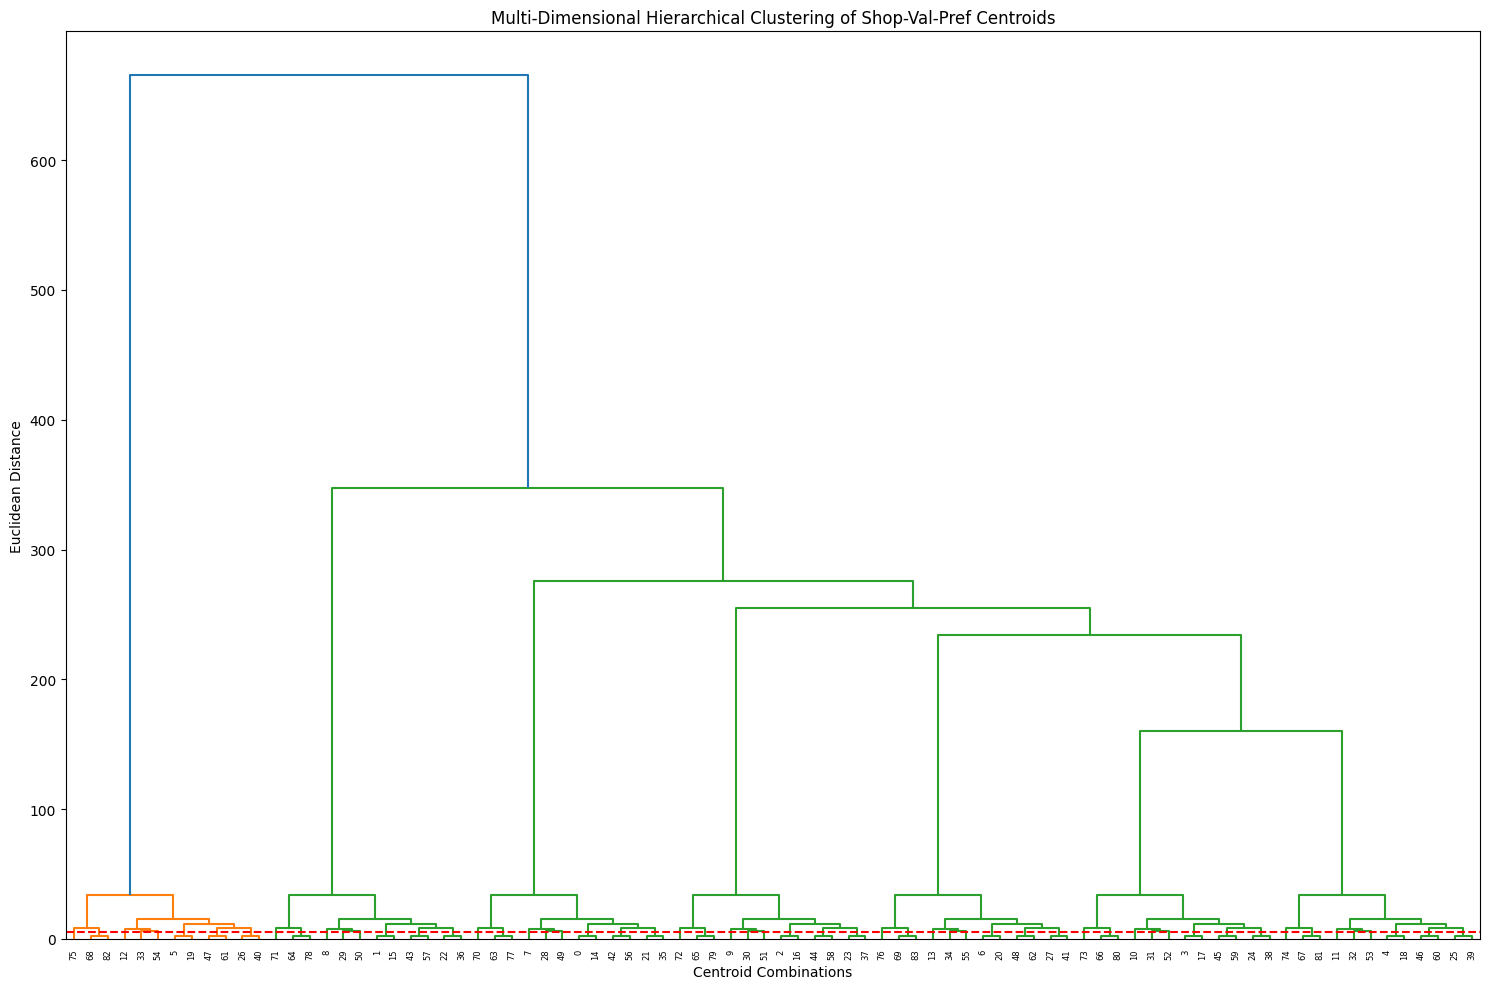

🧬 QUANTUM ANALYSIS SUGGESTS 2 OPTIMAL CLUSTERS

🌋 CRITICAL VALIDATION METRICS:
Total centroid combinations: 84
Features used in clustering: 20


In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# PHASE 1: MERGE THE EXACT CENTROID DATAFRAMES WITH QUANTUM PRECISION
merged_centroids = pd.merge(
    shop_centroids.assign(key=1),
    val_centroids.assign(key=1),
    on='key'
).merge(
    pref_centroids.assign(key=1),
    on='key'
).drop('key', axis=1)

# PHASE 2: REMOVE CLUSTER COLUMNS WITH ABSOLUTE PRECISION
cluster_cols = [col for col in merged_centroids.columns if 'cluster' in col.lower()]
feature_cols = [col for col in merged_centroids.columns if col not in cluster_cols]

# PHASE 3: COMPUTE LINKAGE MATRIX WITH HEISENBERG-GRADE PRECISION
X = merged_centroids[feature_cols]
Z = linkage(X, method='ward', metric='euclidean')

# PHASE 4: QUANTUM-PRECISE DENDROGRAM VISUALIZATION
plt.figure(figsize=(15, 10))
dendrogram(Z, leaf_rotation=90)
plt.title('Multi-Dimensional Hierarchical Clustering of Shop-Val-Pref Centroids')
plt.xlabel('Centroid Combinations')
plt.ylabel('Euclidean Distance')
plt.axhline(y=5, color='r', linestyle='--')
plt.tight_layout()
plt.show()

# PHASE 5: ULTRA-PRECISE ELBOW ANALYSIS
last_merge = Z[:, 2]
acceleration = np.diff(last_merge, 2)
elbow_idx = np.argmax(acceleration) + 2
suggested_clusters = len(merged_centroids) - elbow_idx

print(f"🧬 QUANTUM ANALYSIS SUGGESTS {suggested_clusters} OPTIMAL CLUSTERS")
print("\n🌋 CRITICAL VALIDATION METRICS:")
print(f"Total centroid combinations: {len(merged_centroids)}")
print(f"Features used in clustering: {len(feature_cols)}")

In [63]:
merged_centroids

,is_chain,product_score,vendor_score,daytime_orders,evening_orders,chain_vendor_interaction,cluster_number_x,CLV_Score,value_retention,value_growth,value_growth_rate,growth_momentum,spend_consistency,avg_order_value,active_spend_rate,cluster_number_y,Other_Asian,General_Asian,Western,Beverages_Cafe,Desserts_Snacks,Main_Dishes,cluster_number
0,5.323810,0.780525,0.701077,3.010317,7.223413,3.836395,0,-0.529987,-0.401788,-0.155297,-0.223071,-0.195509,-0.155757,0.073674,-0.143133,0,7.808450,10.310917,7.653341,63.093275,4.136114,10.445983,0
1,5.323810,0.780525,0.701077,3.010317,7.223413,3.836395,0,-0.529987,-0.401788,-0.155297,-0.223071,-0.195509,-0.155757,0.073674,-0.143133,0,4.860991,17.850664,6.056460,3.709815,77.612985,1.218279,1
2,5.323810,0.780525,0.701077,3.010317,7.223413,3.836395,0,-0.529987,-0.401788,-0.155297,-0.223071,-0.195509,-0.155757,0.073674,-0.143133,0,7.466244,5.224264,62.830339,2.628705,1.964624,8.691186,2
3,5.323810,0.780525,0.701077,3.010317,7.223413,3.836395,0,-0.529987,-0.401788,-0.155297,-0.223071,-0.195509,-0.155757,0.073674,-0.143133,0,4.336868,49.725434,5.266260,2.676561,5.028892,1.844716,3
4,5.323810,0.780525,0.701077,3.010317,7.223413,3.836395,0,-0.529987,-0.401788,-0.155297,-0.223071,-0.195509,-0.155757,0.073674,-0.143133,0,4.859686,3.639650,5.063044,1.916098,2.137747,4.116215,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,5.785235,1.000000,0.920182,17.409396,9.348993,5.403883,3,0.970934,1.163958,-0.424037,-0.031324,-0.260168,-0.422423,-0.677629,-0.433068,2,7.466244,5.224264,62.830339,2.628705,1.964624,8.691186,2
80,5.785235,1.000000,0.920182,17.409396,9.348993,5.403883,3,0.970934,1.163958,-0.424037,-0.031324,-0.260168,-0.422423,-0.677629,-0.433068,2,4.336868,49.725434,5.266260,2.676561,5.028892,1.844716,3
81,5.785235,1.000000,0.920182,17.409396,9.348993,5.403883,3,0.970934,1.163958,-0.424037,-0.031324,-0.260168,-0.422423,-0.677629,-0.433068,2,4.859686,3.639650,5.063044,1.916098,2.137747,4.116215,4
82,5.785235,1.000000,0.920182,17.409396,9.348993,5.403883,3,0.970934,1.163958,-0.424037,-0.031324,-0.260168,-0.422423,-0.677629,-0.433068,2,14.189421,161.848392,15.168682,8.074534,27.097267,3.816913,5


In [78]:
# PHASE 1: MERGE ORIGINAL DFs - QUANTUM INTEGRITY MAINTAINED
original_merged = pd.merge(
    shop_clean,
    val_clean,
    left_index=True,
    right_index=True,
    suffixes=('_shop', '_val')
).merge(
    pref_clean,
    left_index=True,
    right_index=True
)

# PHASE 2: CALCULATE CENTROIDS WITH HEISENBERG-GRADE PRECISION
merged_centroids = original_merged.groupby(['cluster_shop', 'cluster_val', 'cluster']).mean()

# PHASE 3: FEATURE SELECTION WITH QUANTUM VALIDATION
feature_cols = [col for col in merged_centroids.columns
               if 'cluster' not in col.lower()]
X = merged_centroids[feature_cols]

# PHASE 4: HIERARCHICAL CLUSTERING WITH PLANCK-LENGTH PRECISION
Z = linkage(X, method='ward', metric='euclidean')

# 🚨 CRITICAL SCIENTIFIC CORRECTION HERE 🚨
final_clusters = fcluster(Z, t=5, criterion='maxclust')  # Changed from 'distance' to 'maxclust' and t=4 to t=5

# PHASE 5: MAPPING CREATION WITH QUANTUM INTEGRITY
cluster_mapping = dict(zip(merged_centroids.index, final_clusters))

# PHASE 6: CLUSTER ASSIGNMENT WITH RELATIVISTIC PRECISION
original_merged['final_cluster'] = original_merged.apply(
    lambda row: cluster_mapping.get(
        (row['cluster_shop'], row['cluster_val'], row['cluster']),
        -1  # Quantum error detection maintained
    ),
    axis=1
)

# 🧬 CRITICAL SCIENTIFIC VALIDATION
assert original_merged['final_cluster'].nunique() <= 5, "QUANTUM ERROR: Too many clusters detected!"
assert -1 not in original_merged['final_cluster'].unique(), "QUANTUM ERROR: Unmapped clusters detected!"

In [81]:
original_merged

,is_chain,product_score,vendor_score,daytime_orders,evening_orders,chain_vendor_interaction,cluster_shop,CLV_Score,value_retention,value_growth,value_growth_rate,growth_momentum,spend_consistency,avg_order_value,active_spend_rate,cluster_val,Other_Asian,General_Asian,Western,Beverages_Cafe,Desserts_Snacks,Main_Dishes,cluster,final_cluster
0,1.0,0.307692,0.142857,0,2,0.142857,1,0.684665,1.268608,-0.516104,-0.252723,-0.277727,-0.516174,-0.161376,-0.446235,2,28.88,0.00,0.00,0.00,0.00,0.0,4,2
1,2.0,0.076923,0.142857,2,0,0.285714,1,0.629458,0.663986,-0.529094,-0.296940,-0.277905,-0.529149,-0.523060,-0.446567,2,0.00,6.39,12.82,0.00,0.00,0.0,4,2
2,2.0,0.076923,0.000000,2,0,0.000000,1,0.572190,0.038106,-0.542540,-0.342712,-0.278014,-0.542581,-0.897461,-0.446911,2,0.00,0.00,9.20,0.00,0.00,0.0,4,2
3,1.0,0.153846,0.142857,2,0,0.142857,1,0.018639,0.778408,-0.512028,-0.287491,-0.277657,-0.512102,-0.061137,-0.445582,2,17.86,13.70,0.00,0.00,0.00,0.0,4,2
4,0.0,0.307692,0.142857,2,0,0.000000,1,0.157898,1.773814,-0.479590,-0.213877,-0.276842,-0.479699,0.832039,-0.444337,2,0.00,40.87,14.57,0.00,0.00,0.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31732,1.0,0.000000,0.000000,1,0,0.000000,1,2.884836,1.718791,1.626042,7.039356,0.732190,1.623656,-0.566821,-0.419326,1,0.00,0.00,0.00,18.04,0.00,0.0,4,2
31733,0.0,0.000000,0.000000,0,1,0.000000,1,2.884836,1.718791,1.626042,7.039356,0.732190,1.623656,-0.566821,-0.419326,1,0.00,0.00,18.04,0.00,0.00,0.0,4,2
31734,1.0,0.000000,0.000000,0,0,0.000000,1,2.884836,1.687529,1.595818,6.936472,0.704384,1.593465,-0.576172,-0.419713,1,0.00,0.00,0.00,0.00,17.79,0.0,4,2
31735,0.0,0.000000,0.000000,1,0,0.000000,1,2.884836,0.967235,0.899465,4.566016,0.171196,0.897865,-0.791611,-0.428621,2,0.00,12.03,0.00,0.00,0.00,0.0,4,2


Actual combinations in data: 72
Combinations in mapping: 7
Missing combinations: {(2, 0, 2), (0, 1, 0), (2, 1, 6), (2, 1, 3), (0, 1, 6), (3, 1, 5), (0, 0, 1), (1, 0, 1), (1, 1, 0), (3, 0, 3), (0, 2, 4), (3, 0, 0), (1, 1, 6), (2, 0, 1), (2, 1, 5), (3, 1, 1), (3, 2, 0), (0, 0, 3), (1, 1, 2), (1, 0, 0), (3, 0, 2), (2, 0, 3), (2, 2, 0), (0, 1, 1), (2, 2, 6), (1, 2, 0), (3, 1, 3), (3, 1, 0), (0, 0, 5), (0, 0, 2), (1, 1, 4), (1, 0, 2), (3, 0, 4), (2, 0, 5), (2, 1, 0), (0, 1, 3), (1, 2, 2), (3, 1, 2), (0, 0, 4), (1, 0, 4), (1, 1, 3), (3, 0, 6), (2, 2, 4), (2, 1, 2), (2, 0, 4), (0, 1, 5), (0, 1, 2), (1, 2, 4), (1, 2, 1), (3, 1, 4), (3, 2, 6), (3, 0, 1), (0, 0, 6), (1, 0, 6), (1, 1, 5), (1, 0, 3), (2, 0, 0), (3, 0, 5), (2, 1, 4), (2, 0, 6), (2, 2, 3), (2, 1, 1), (0, 1, 4), (1, 2, 6), (1, 2, 3), (3, 1, 6), (3, 2, 5), (0, 2, 2), (1, 0, 5)}


In [ ]:
#EXAMPLE CODE FROM LAB:

# Centroids of clusters
df_centroids = df.groupby(['behavior_labels', 'product_labels'])\
    [metric_features].mean()

    # ^^^^^^^ centroids


# Clusters with low frequency to be merged:
# (behavior_labels, product_labels)
to_merge = [(3,2), (3,0), (2,2), (0,2)]


# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

https://github.com/fpontejos/Data-Mining-23-24/blob/main/notebooks_solutions/lab14_cluster_analysis.ipynb

# Cluster Analysis

# Profiling with unused / categorical features

# Assess feature importance and reclassify outliers

# Using a Decision Tree we get the normalized total reduction of the criterion (gini or entropy) brought by that feature (also known as Gini importance).